# Import Data

In [106]:
import pandas as pd 
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns
from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler #mamanggil minmaxscaler dan StandardScaler dari sklearn processing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder #memanggil model encode onehotencoder,LabelEncoder,OrdinalEncoder dari sklearn processing
import pickle #memanggil pickle
from sklearn.metrics import classification_report, accuracy_score,  f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors
from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Data Loading

In [107]:
df = pd.read_csv('./dataset/clean_dataset/company 1_clean.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              5760 non-null   int64  
 1   KWH                      5760 non-null   float64
 2   BLTH                     5760 non-null   object 
 3   has_invoice              5760 non-null   bool   
 4   tarif                    5760 non-null   object 
 5   daya                     5760 non-null   float64
 6   address                  5760 non-null   object 
 7   amr_online               5760 non-null   bool   
 8   city_id                  5760 non-null   int64  
 9   city_name                5760 non-null   object 
 10  fare_type                5760 non-null   object 
 11  fkm                      5760 non-null   int64  
 12  gardu_id                 5760 non-null   object 
 13  latitude                 5760 non-null   float64
 14  longitude               

In [113]:
A = df['customer_id'].count()
A

5760

In [3]:
df.head()

,customer_id,KWH,BLTH,has_invoice,tarif,daya,address,amr_online,city_id,city_name,...,ulp_name,up3,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,meter_type_id,frt,pemakaian_kwh.1
0,111100072530,3795.00,2013-08,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
1,111100072530,3664.00,2013-09,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
2,111100072530,4305.00,2013-10,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
3,111100072530,3755.72,2013-11,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
4,111100072530,3452.89,2013-12,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0


In [4]:
# Filter data dengan kondisi 'KWH' kurang dari 0 dan 'city_id' di antara 3000 - 4000
filtered_data = df[(df['KWH'] < 0)]

filtered_data

,customer_id,KWH,BLTH,has_invoice,tarif,daya,address,amr_online,city_id,city_name,...,ulp_name,up3,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,meter_type_id,frt,pemakaian_kwh.1
3124,537114669029,-652.25,2013-12,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3125,537114669029,-17065.15,2014-01,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3128,537114669029,-10218.04,2014-04,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3129,537114669029,-20952.91,2014-05,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3130,537114669029,-11792.19,2014-06,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3141,537114669029,-12070.85,2015-05,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3143,537114669029,-7997.01,2015-07,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3144,537114669029,-14523.59,2015-08,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3145,537114669029,-6402.94,2015-09,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0
3147,537114669029,-5762.01,2015-11,False,B2,23000.0,KP KAYURINGIN JAYA No...,True,3275,KOTA BEKASI,...,53711 - BEKASI KOTA,53BKS,telkomsel,HIDUP,BKS050,True,True,M,1,4237.0


In [5]:
df = df.drop(filtered_data.index)
df.head()

,customer_id,KWH,BLTH,has_invoice,tarif,daya,address,amr_online,city_id,city_name,...,ulp_name,up3,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,meter_type_id,frt,pemakaian_kwh.1
0,111100072530,3795.00,2013-08,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
1,111100072530,3664.00,2013-09,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
2,111100072530,4305.00,2013-10,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
3,111100072530,3755.72,2013-11,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0
4,111100072530,3452.89,2013-12,False,B2,10600.0,JL RAWA SAKTI 10 No.0 RT.0 RW.0 JEULINGKE,True,1106,KAB. ACEH BESAR,...,11115 - SYIAH KUALA,11BNA,telkomsel,HIDUP,NAD281,True,True,A,1,3455.0


In [6]:
filtered_data = df[(df['KWH'] < 0)]
filtered_data

,customer_id,KWH,BLTH,has_invoice,tarif,daya,address,amr_online,city_id,city_name,...,ulp_name,up3,company_id,latest_status_id,site_id,registered_to_infoblast,direct_measure,meter_type_id,frt,pemakaian_kwh.1


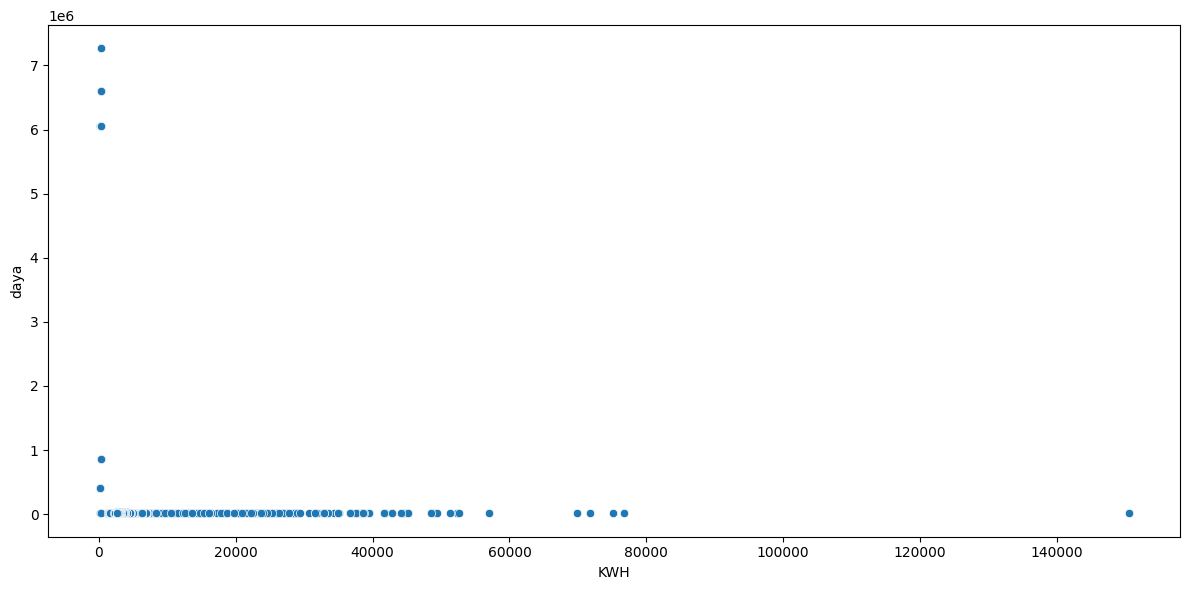

In [7]:
plt.figure(figsize=(12, 6))  

# Scatterplot 1
plt.subplot(1, 1, 1)
sns.scatterplot(data=df, x="KWH", y="daya")
plt.title('')

# # Scatterplot 2
# plt.subplot(1, 3, 2)
# sns.scatterplot(data=df, x="KWH", y="latitude")
# plt.title('')

# # Scatterplot 3
# plt.subplot(1, 3, 3)
# sns.scatterplot(data=df, x="KWH", y="city_id")
# plt.title('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


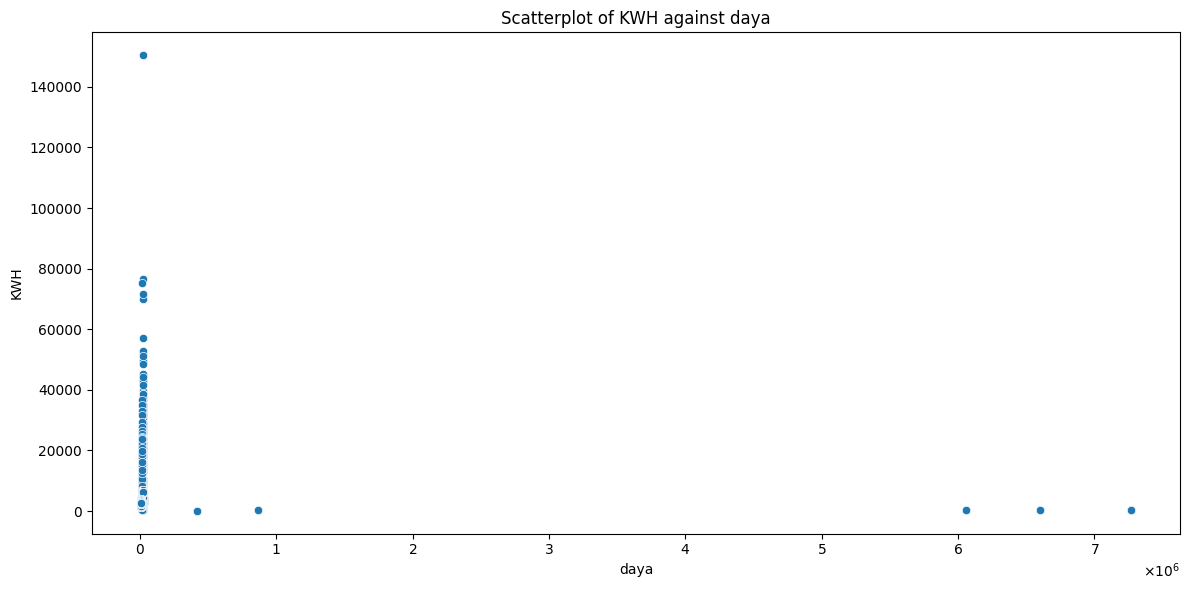

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 6))

# Scatterplot for KWH against daya
plt.subplot(1, 1, 1)
sns.scatterplot(data=df, x="daya", y="KWH")  # Switched x and y for original 'daya' values on x-axis
plt.title('Scatterplot of KWH against daya')

# Customize x-axis formatter to remove scientific notation
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


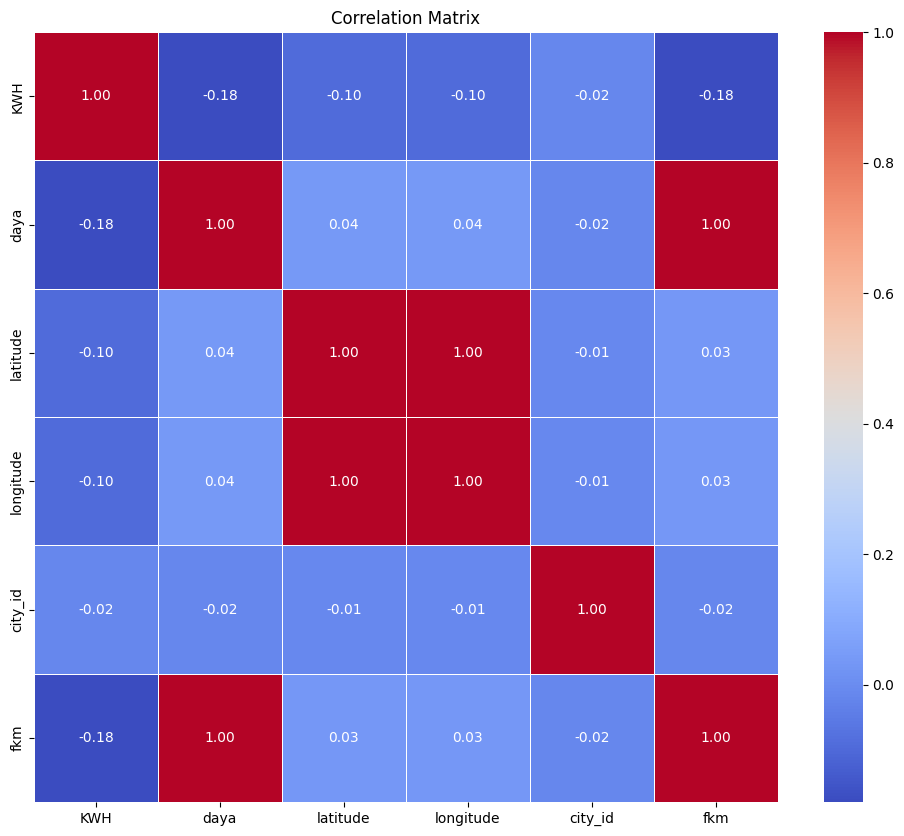

In [9]:
# list kolom yang akan diuji korelasinya
list = ['KWH', 'daya', 'latitude', 'longitude','city_id','fkm']
# mendefinisikan ukuran gambar
plt.figure(figsize=(12, 10))
# plot korelasi setiap variable menggunakan heatmap
sns.heatmap(df[list].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Memberikan judul
plt.title('Correlation Matrix')
# menampilkan correlation matrix
plt.show()

In [10]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,customer_id,48
1,KWH,5360
2,daya,10
3,city_id,34
4,fkm,4
5,latitude,48
6,longitude,48
7,province_id,11
8,uiw,11
9,ulp,35


In [11]:
df = df.drop(columns=['ulp','pemakaian_kwh.1','frt','province_id','uiw','fkm'])

In [12]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['object']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,BLTH,120
1,tarif,3
2,address,48
3,city_name,34
4,fare_type,3
5,gardu_id,48
6,meter_description,1
7,name,42
8,payment_type,1
9,pemda_id,29


In [13]:
df = df.drop(columns=['address','city_name','fare_type','gardu_id','meter_description','name','payment_type','pemda_id','province_name'
                                   ,'uiw_name','ulp_name','up3','company_id','latest_status_id','site_id','meter_type_id','has_invoice','amr_online','registered_to_infoblast','direct_measure'])

In [14]:
# df = df.drop(columns=['address','city_name','fare_type','gardu_id','meter_description','name','payment_type','pemda_id','province_name'
#                                    ,'uiw_name','ulp_name','up3','company_id','latest_status_id','site_id','meter_type_id','has_invoice','amr_online','registered_to_infoblast','direct_measure','tarif','city_id','latitude','longitude'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5738 entries, 0 to 5759
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5738 non-null   int64  
 1   KWH          5738 non-null   float64
 2   BLTH         5738 non-null   object 
 3   tarif        5738 non-null   object 
 4   daya         5738 non-null   float64
 5   city_id      5738 non-null   int64  
 6   latitude     5738 non-null   float64
 7   longitude    5738 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 403.5+ KB


In [16]:
bool_columns = df.select_dtypes(include='bool').columns
print("\nKolom dengan tipe data boolean:")
print(bool_columns)


Kolom dengan tipe data boolean:
Index([], dtype='object')


In [17]:
num_cols = (df.select_dtypes(exclude=['object','period[M]']).columns)

listItem= []

for col in num_cols:
  listItem.append([col, df[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,customer_id,-0.725407
1,KWH,10.109831
2,daya,3.604524
3,city_id,1.022291
4,latitude,6.697871
5,longitude,6.697871


In [18]:
df_skew = df._get_numeric_data()
for k, v in df_skew.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df_skew)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column customer_id outliers = 0.00%
Column KWH outliers = 21.59%
Column daya outliers = 12.55%
Column city_id outliers = 10.46%
Column latitude outliers = 2.09%
Column longitude outliers = 23.00%


In [19]:
winsoriser1 = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['KWH','daya','city_id','latitude','longitude'],
                            missing_values='ignore')
winsoriser1.fit(df)
df_skew_capped = winsoriser1.transform(df)

In [20]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

customer_id - Before Capping


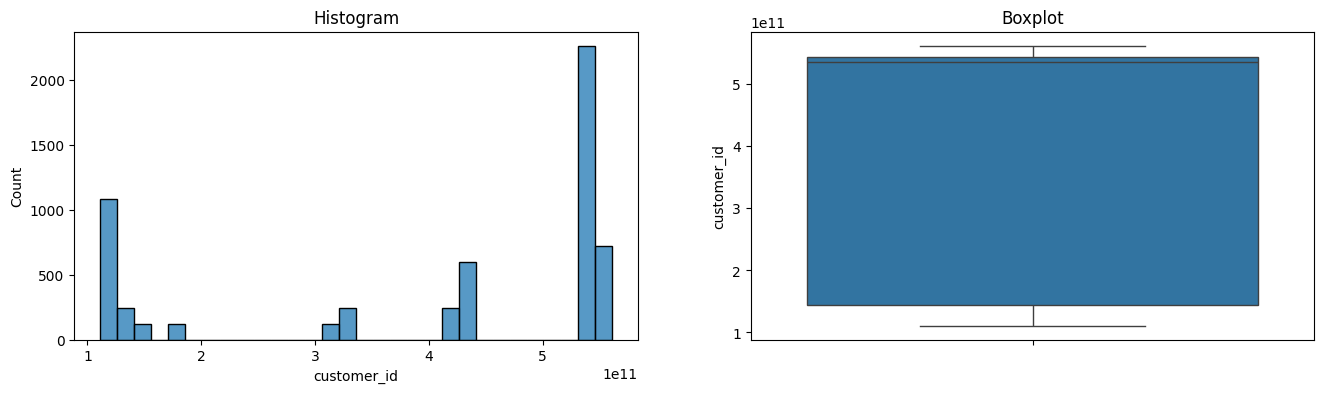


customer_id - After Capping


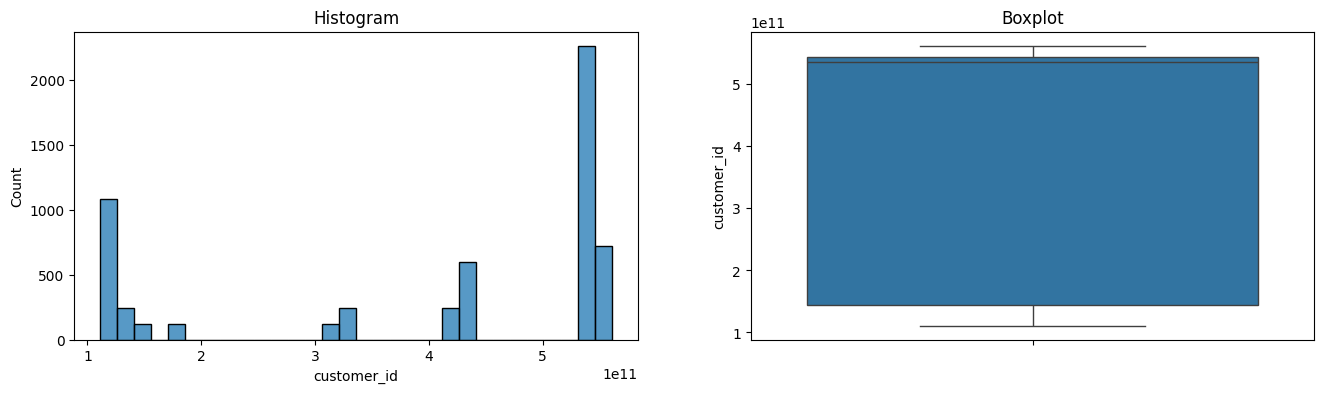

KWH - Before Capping


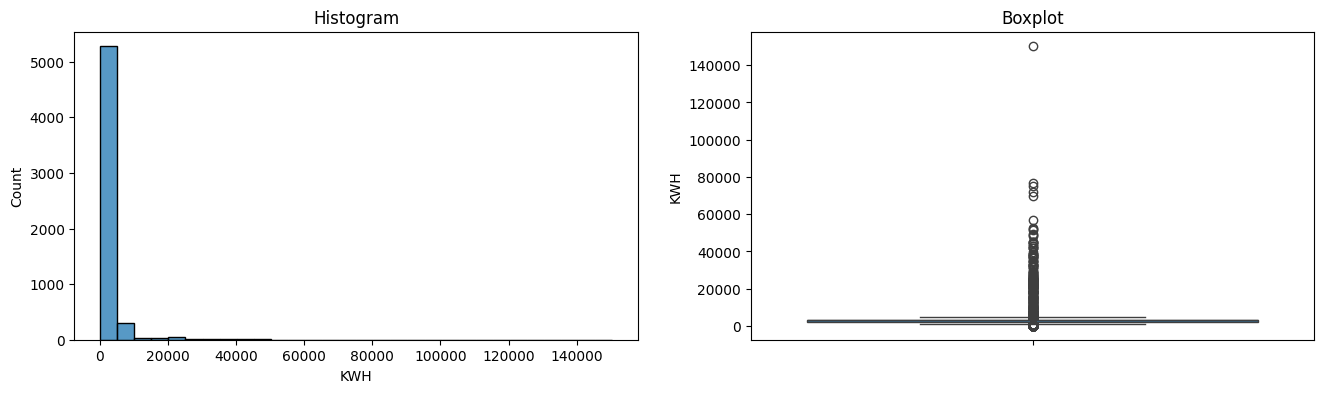


KWH - After Capping


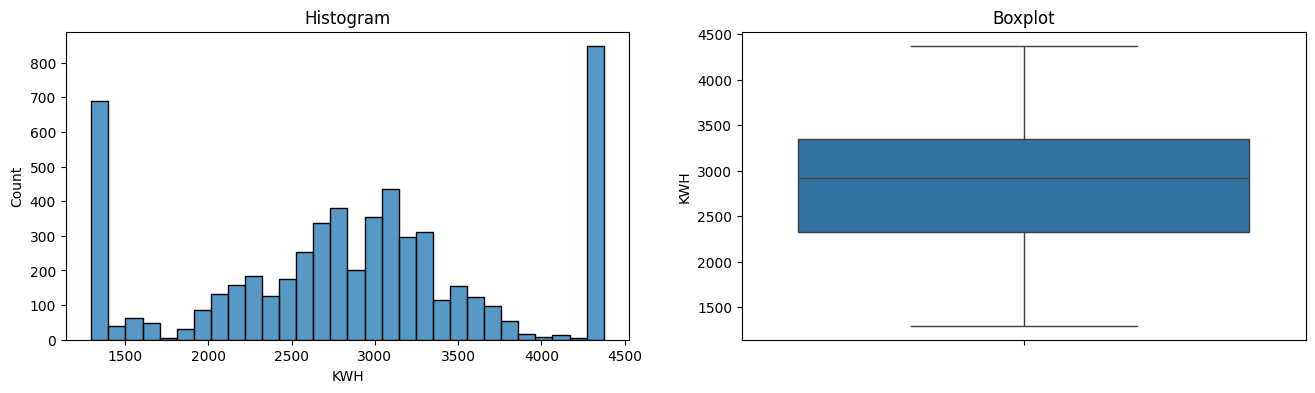

daya - Before Capping


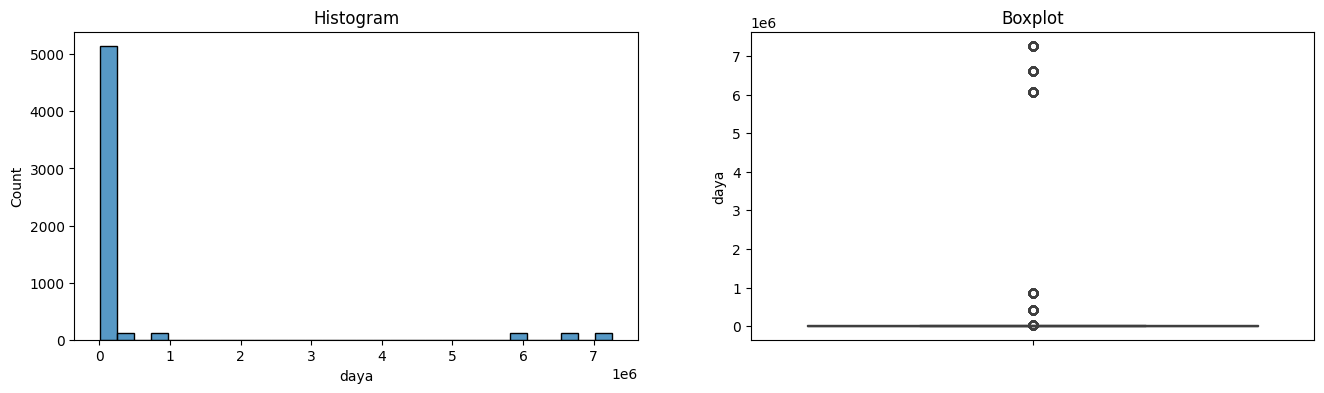


daya - After Capping


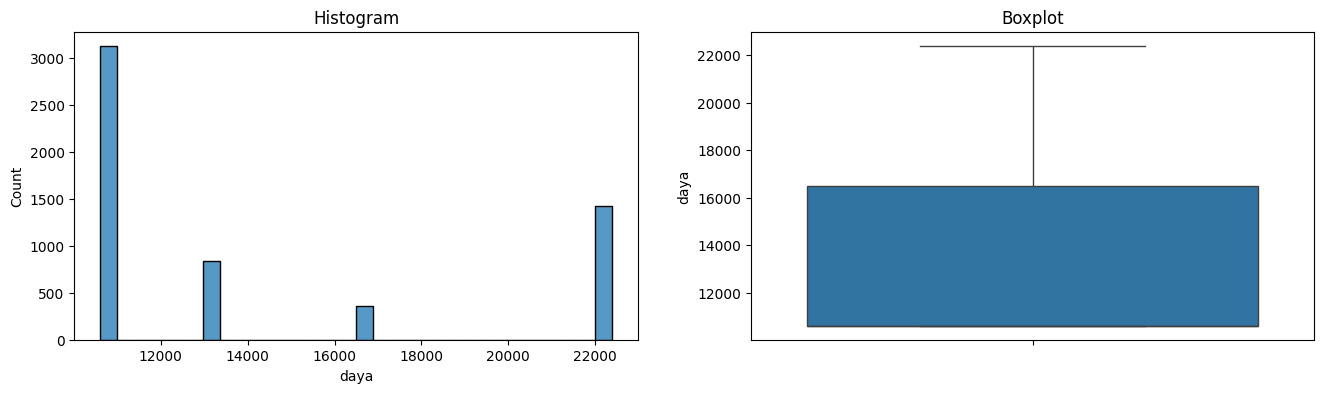

city_id - Before Capping


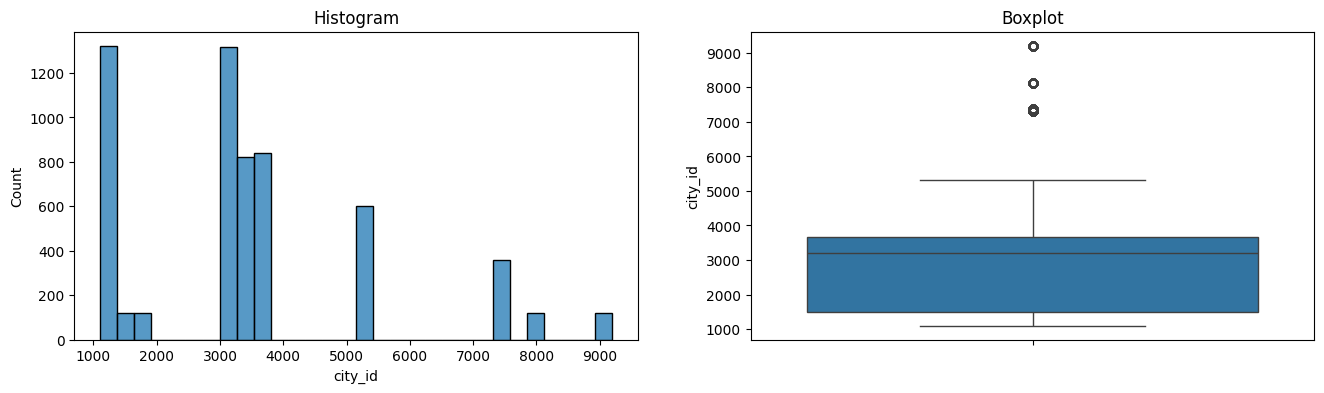


city_id - After Capping


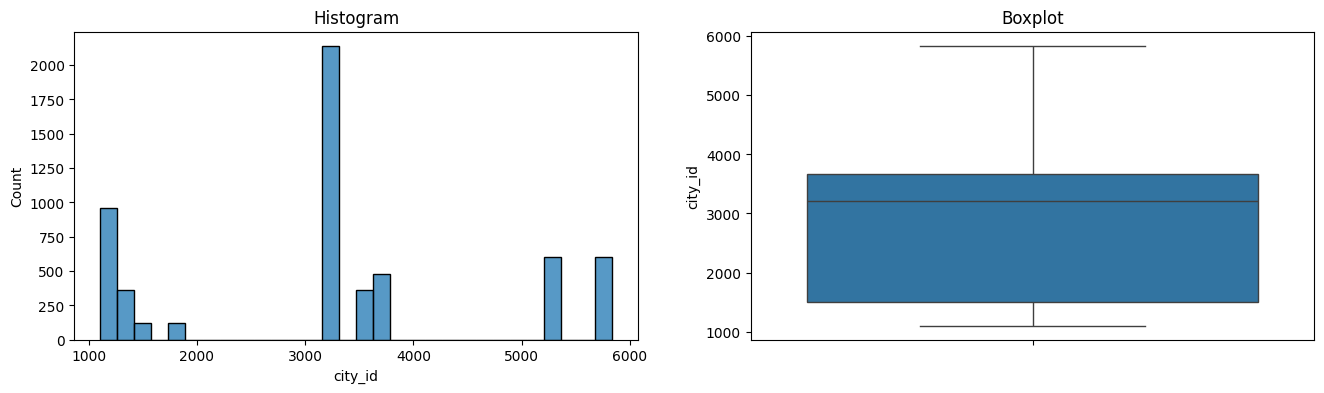

latitude - Before Capping


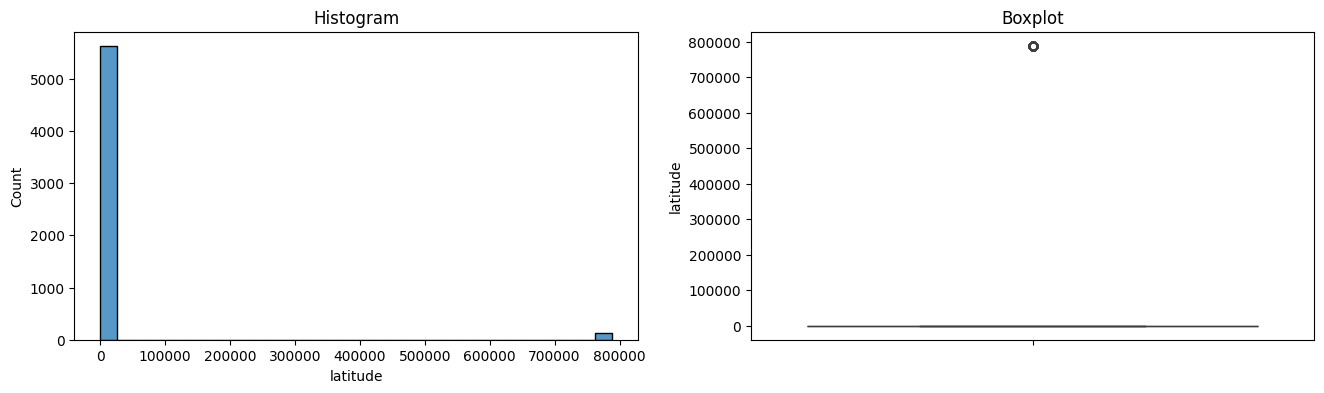


latitude - After Capping


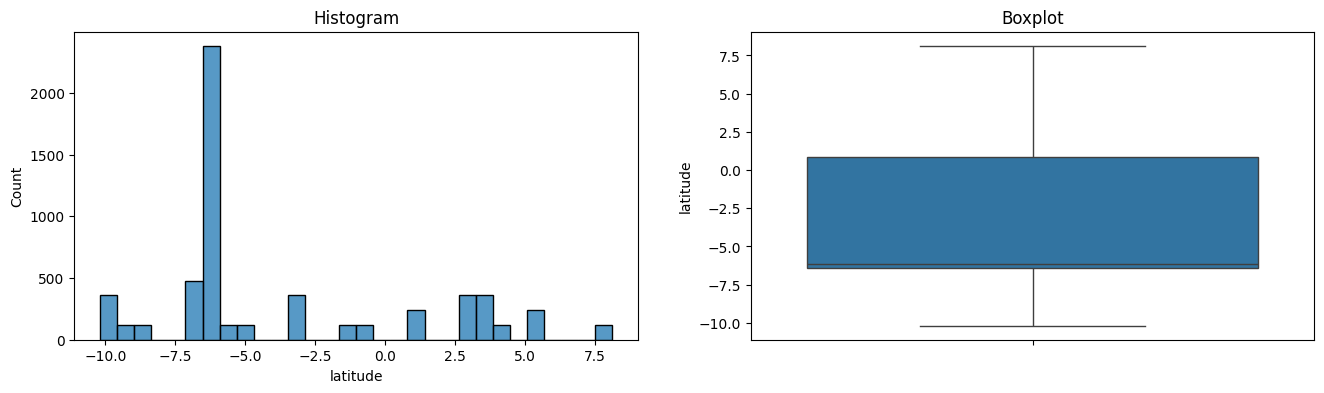

longitude - Before Capping


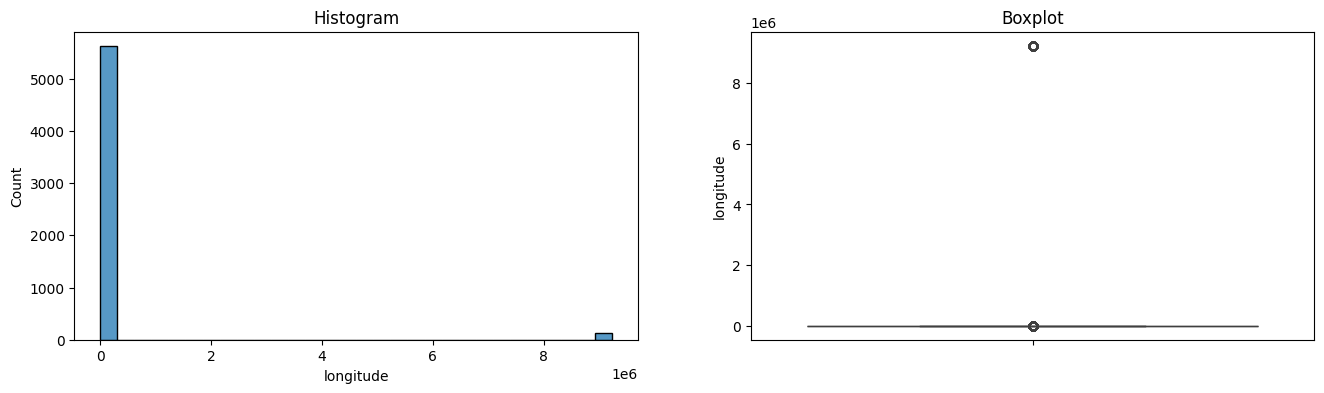


longitude - After Capping


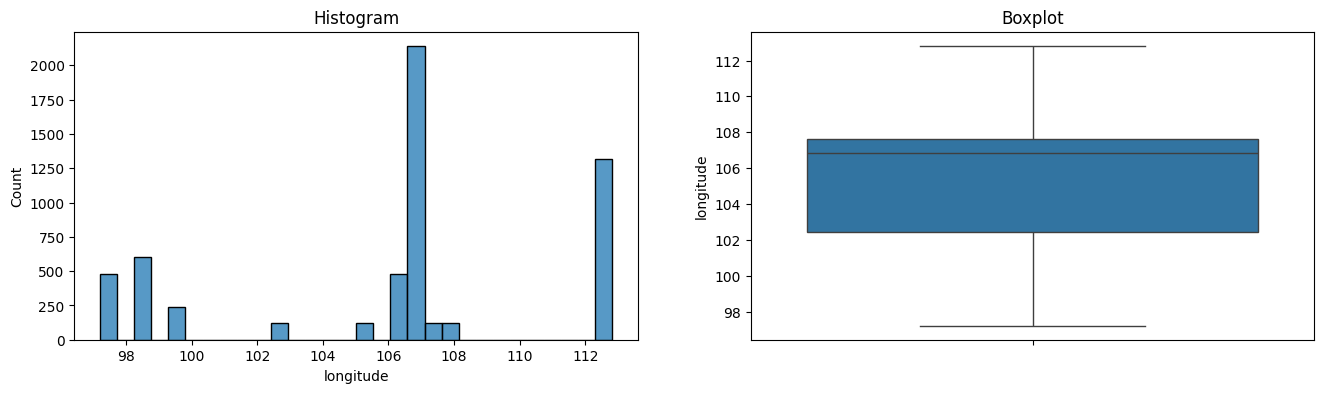

In [21]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(df_skew, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(df_skew_capped, col)

In [22]:
df_skew_capped

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude
0,111100072530,3795.00,2013-08,B2,10600.0,1106,5.581664,97.211578
1,111100072530,3664.00,2013-09,B2,10600.0,1106,5.581664,97.211578
2,111100072530,4305.00,2013-10,B2,10600.0,1106,5.581664,97.211578
3,111100072530,3755.72,2013-11,B2,10600.0,1106,5.581664,97.211578
4,111100072530,3452.89,2013-12,B2,10600.0,1106,5.581664,97.211578
...,...,...,...,...,...,...,...,...
5755,561400171886,2697.86,2023-03,B2,10600.0,3673,-6.130831,106.225094
5756,561400171886,2702.84,2023-04,B2,10600.0,3673,-6.130831,106.225094
5757,561400171886,2719.31,2023-05,B2,10600.0,3673,-6.130831,106.225094
5758,561400171886,2768.72,2023-06,B2,10600.0,3673,-6.130831,106.225094


In [23]:
from sklearn.preprocessing import StandardScaler
import joblib
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.compose import make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector

In [24]:
df_skew_capped['customer_id'] = df_skew_capped['customer_id'].astype(int)

In [25]:
df_skew_capped = df_skew_capped.drop(columns=['BLTH'])
# df_skew_capped = df_skew_capped.drop(columns=['city_id'])
# df_skew_capped = df_skew_capped.drop(columns=['latitude'])
# df_skew_capped = df_skew_capped.drop(columns=['longitude'])
# df_skew_capped = df_skew_capped.drop(columns=['tarif'])
# df_skew_capped = df_skew_capped.drop(columns=['KWH'])

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_skew_capped['tarif'] = label_encoder.fit_transform(df_skew_capped['tarif'])


In [27]:
# Feature scaling
scaler = StandardScaler()
df_skew_capped_scaler = scaler.fit_transform(df_skew_capped)

# Dimensionality Reduction using PCA

pca = PCA()
pca.fit_transform(df_skew_capped)

array([[-6.65475255e+08, -3.35160652e+03, -2.22612976e+03, ...,
         4.01910383e+00, -8.73597915e-01,  1.17515156e-01],
       [-6.65475255e+08, -3.35095925e+03, -2.22600086e+03, ...,
         3.98482739e+00, -9.11765640e-01,  9.20981408e-02],
       [-6.65475255e+08, -3.35412641e+03, -2.22663162e+03, ...,
         4.15254647e+00, -7.25006008e-01,  2.16466897e-01],
       ...,
       [-1.33694198e+09, -2.99564604e+03,  2.39855934e+02, ...,
        -2.98300431e+00, -9.74001415e-01, -9.62633279e-03],
       [-1.33694198e+09, -2.99589017e+03,  2.39807313e+02, ...,
        -2.97007607e+00, -9.59605481e-01, -3.96553708e-05],
       [-1.33694198e+09, -2.99563769e+03,  2.39857597e+02, ...,
        -2.98344650e+00, -9.74493808e-01, -9.95423170e-03]])

Text(0, 0.5, 'Eigenvalues')

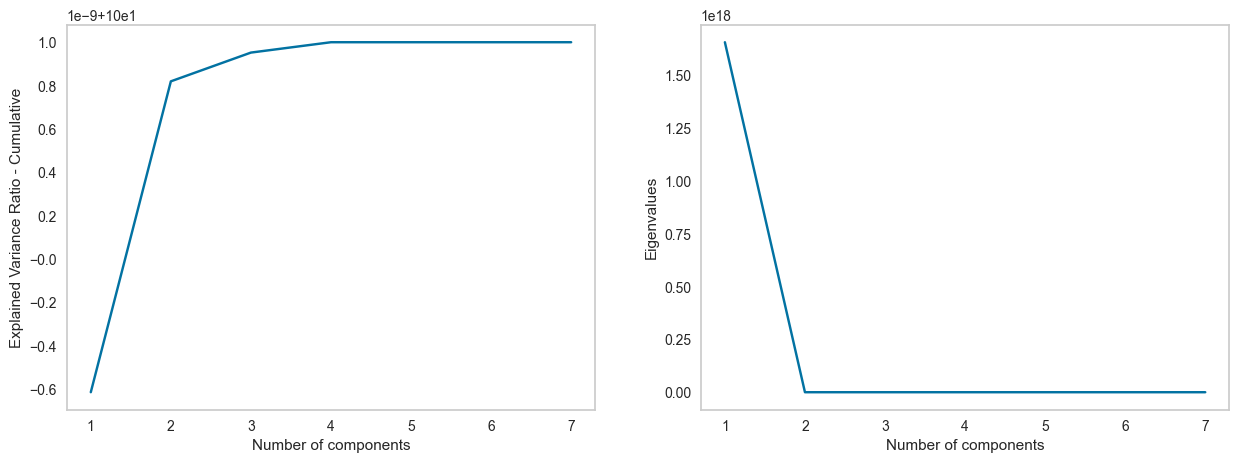

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cumulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [29]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

1

In [30]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(df_skew_capped_scaler)

df_skew_capped_pca = pca.transform(df_skew_capped_scaler)

C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

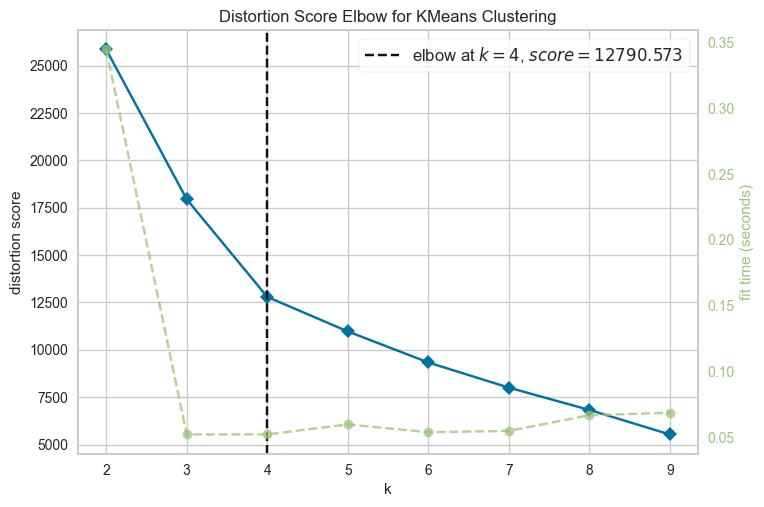

In [31]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_skew_capped_pca)
visualizer.show()
plt.show()

C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

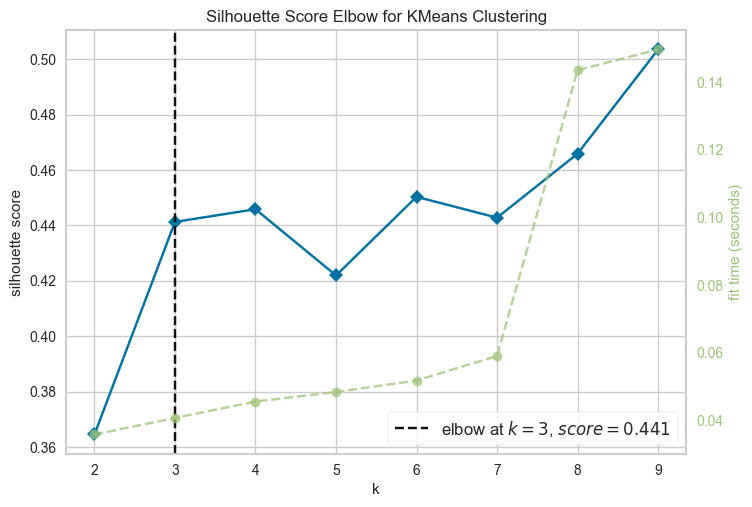

In [32]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(df_skew_capped_pca)
visualizer.show()
plt.show()

In [33]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df_skew_capped_pca is your NumPy array

# Generate generic column names
num_columns = df_skew_capped_pca.shape[1]
column_names = [f'feature_{i}' for i in range(num_columns)]

# Convert NumPy array to DataFrame with generic column names
df_skew_capped_pca_df = pd.DataFrame(df_skew_capped_pca, columns=column_names)

# Initialize and fit K-Means model
KM_5_clusters = KMeans(n_clusters=3, init='k-means++').fit(df_skew_capped_pca_df)

# Convert NumPy array to DataFrame for cluster labels
cluster_labels_df = pd.DataFrame(KM_5_clusters.labels_, columns=['cluster'])

# Concatenate cluster labels DataFrame with the original DataFrame
KM5_clustered = pd.concat([df_skew_capped_pca_df, cluster_labels_df], axis=1)


C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


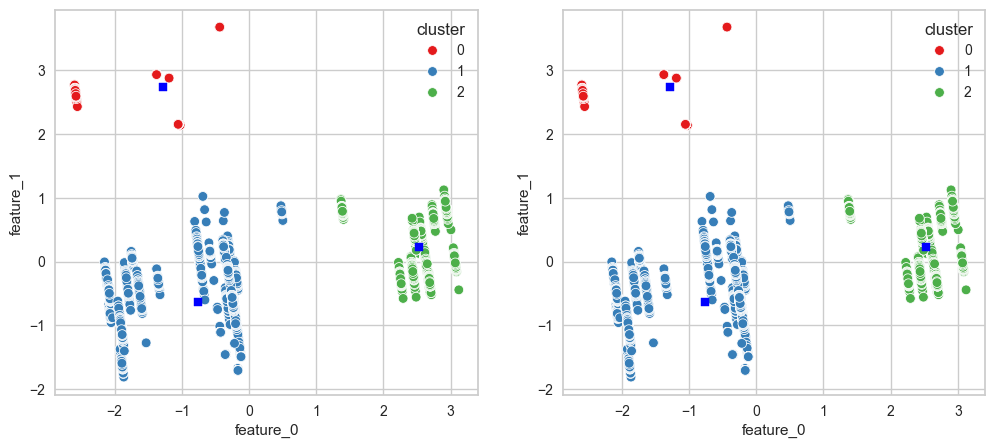

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming df_skew_capped_pca is your NumPy array

# Generate generic column names
num_columns = df_skew_capped_pca.shape[1]
column_names = [f'feature_{i}' for i in range(num_columns)]

# Convert NumPy array to DataFrame with generic column names
df_skew_capped_pca_df = pd.DataFrame(df_skew_capped_pca, columns=column_names)

# Initialize and fit K-Means model
KM_5_clusters = KMeans(n_clusters=3, init='k-means++').fit(df_skew_capped_pca_df)

# Convert NumPy array to DataFrame for cluster labels
cluster_labels_df = pd.DataFrame(KM_5_clusters.labels_, columns=['cluster'])

# Concatenate cluster labels DataFrame with the original DataFrame
KM5_clustered = pd.concat([df_skew_capped_pca_df, cluster_labels_df], axis=1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot 1
scat_1 = sns.scatterplot(x='feature_0', y='feature_1', data=KM5_clustered,
                         hue='cluster', ax=axes[0], palette='Set1', legend='full')

# Scatterplot 2
scat_2 = sns.scatterplot(x='feature_0', y='feature_1', data=KM5_clustered,
                         hue='cluster', ax=axes[1], palette='Set1', legend='full')

# Plot cluster centers
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 1],
                marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 1],
                marker='s', s=40, c="blue")

plt.show()


In [35]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.cluster import KMeans

# # Assuming df_skew_capped_pca is your NumPy array

# # Generate generic column names
# num_columns = df_skew_capped_pca.shape[1]
# column_names = [f'feature_{i}' for i in range(num_columns)]

# # Convert NumPy array to DataFrame with generic column names
# df_skew_capped_pca_df = pd.DataFrame(df_skew_capped_pca, columns=column_names)

# # Initialize and fit K-Means model
# KM_5_clusters = KMeans(n_clusters=4, init='k-means++').fit(df_skew_capped_pca_df)

# # Convert NumPy array to DataFrame for cluster labels
# cluster_labels_df = pd.DataFrame(KM_5_clusters.labels_, columns=['cluster'])

# # Concatenate cluster labels DataFrame with the original DataFrame
# KM5_clustered = pd.concat([df_skew_capped_pca_df, cluster_labels_df], axis=1)

# # Plotting
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# # Scatterplot 1
# scat_1 = sns.scatterplot(x='feature_0', y='feature_1', data=KM5_clustered,
#                          hue='cluster', ax=axes[0], palette='Set1', legend='full')

# # Scatterplot 2
# scat_2 = sns.scatterplot(x='feature_0', y='feature_1', data=KM5_clustered,
#                          hue='cluster', ax=axes[1], palette='Set1', legend='full')

# # Plot cluster centers
# axes[0].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 1],
#                 marker='s', s=40, c="blue")
# axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 1],
#                 marker='s', s=40, c="blue")

# plt.show()


In [36]:
KM_clust_sizes = KM5_clustered.groupby('cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
cluster,
0,720
1,3578
2,1440


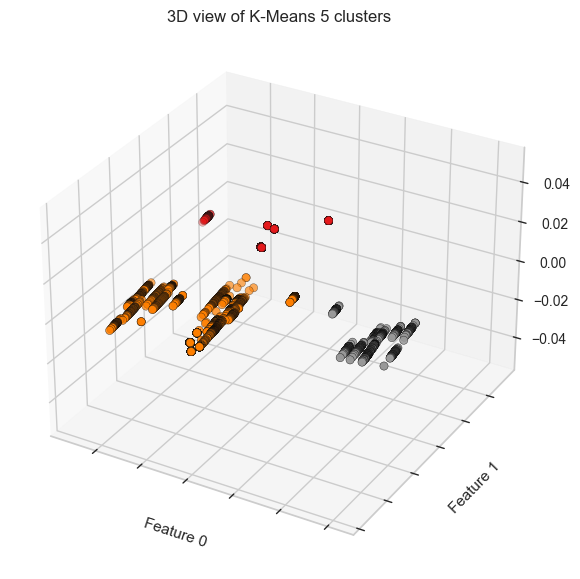

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(KM5_clustered['feature_0'],
           KM5_clustered['feature_1'],
           c=KM5_clustered['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')

ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()


C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


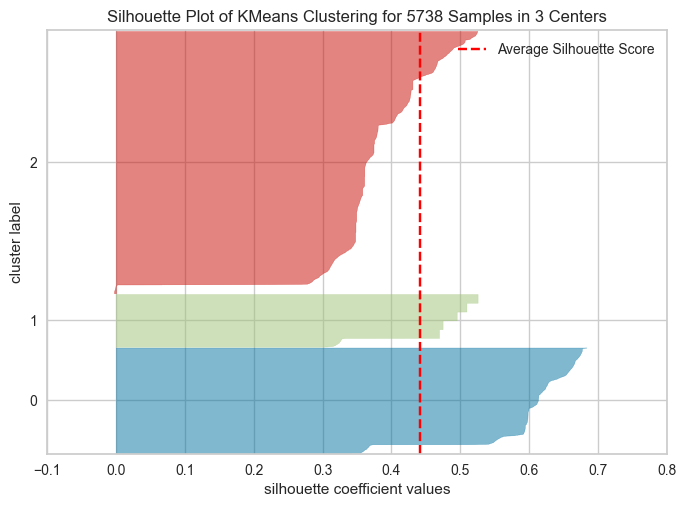

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_skew_capped_pca_df)
visualizer.show()
plt.show()

CLuster 4

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming df_skew_capped_pca is your NumPy array

# Generate generic column names
num_columns = df_skew_capped_pca.shape[1]
column_names = [f'feature_{i}' for i in range(num_columns)]

# Convert NumPy array to DataFrame with generic column names
df_skew_capped_pca_df = pd.DataFrame(df_skew_capped_pca, columns=column_names)

# Initialize and fit K-Means model
KM_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(df_skew_capped_pca_df)

# Convert NumPy array to DataFrame for cluster labels
cluster_labels_df = pd.DataFrame(KM_4_clusters.labels_, columns=['cluster'])

# Concatenate cluster labels DataFrame with the original DataFrame
KM4_clustered = pd.concat([df_skew_capped_pca_df, cluster_labels_df], axis=1)

C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


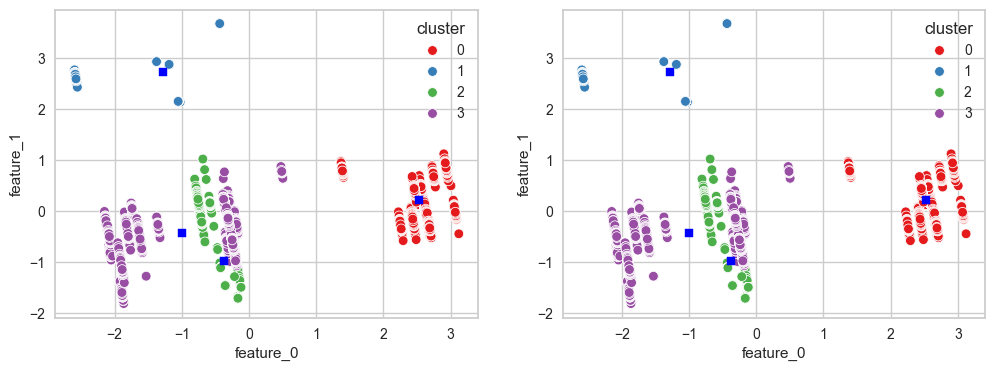

In [40]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Scatterplot 1
scat_1 = sns.scatterplot(x='feature_0', y='feature_1', data=KM4_clustered,
                         hue='cluster', ax=axes[0], palette='Set1', legend='full')

# Scatterplot 2
scat_2 = sns.scatterplot(x='feature_0', y='feature_1', data=KM4_clustered,
                         hue='cluster', ax=axes[1], palette='Set1', legend='full')

# Plot cluster centers
axes[0].scatter(KM_4_clusters.cluster_centers_[:, 0], KM_4_clusters.cluster_centers_[:, 1],
                marker='s', s=40, c="blue")
axes[1].scatter(KM_4_clusters.cluster_centers_[:, 0], KM_4_clusters.cluster_centers_[:, 1],
                marker='s', s=40, c="blue")

plt.show()

In [41]:
KM6_clust_sizes = KM4_clustered.groupby('cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
cluster,
0,1440
1,720
2,1378
3,2200


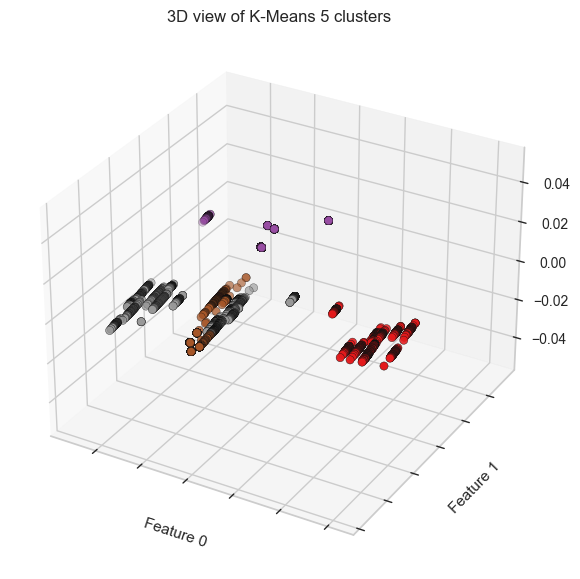

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(KM4_clustered['feature_0'],
           KM4_clustered['feature_1'],
           c=KM4_clustered['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')

ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()


C:\Users\Mardhya\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


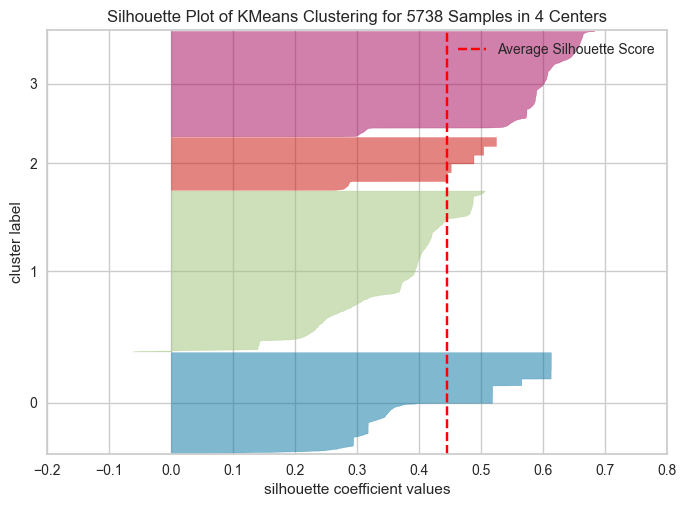

In [43]:
model = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_skew_capped_pca)
visualizer.show()
plt.show()

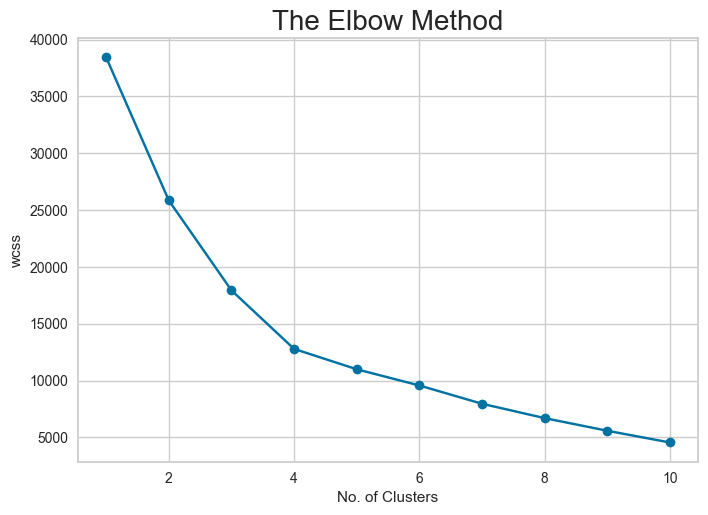

In [44]:
wcss = []
random_state = 6
max_cluster = 15
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, 
                init = 'k-means++', 
                max_iter = 300,
                n_init = 10, 
                random_state = random_state)
    km.fit(df_skew_capped_pca)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3645125186713689
For n_clusters = 3 The average silhouette_score is : 0.44125089895563463
For n_clusters = 4 The average silhouette_score is : 0.44583107128960386
For n_clusters = 5 The average silhouette_score is : 0.42667288728779545
For n_clusters = 6 The average silhouette_score is : 0.44135588541960924
For n_clusters = 7 The average silhouette_score is : 0.47436174860541713
For n_clusters = 8 The average silhouette_score is : 0.4681969769315261
For n_clusters = 9 The average silhouette_score is : 0.501131224781199
For n_clusters = 10 The average silhouette_score is : 0.5145059142515048
For n_clusters = 11 The average silhouette_score is : 0.5428873303423082
For n_clusters = 12 The average silhouette_score is : 0.5571464014668944
For n_clusters = 13 The average silhouette_score is : 0.5768530644615099
For n_clusters = 14 The average silhouette_score is : 0.5919924729989963


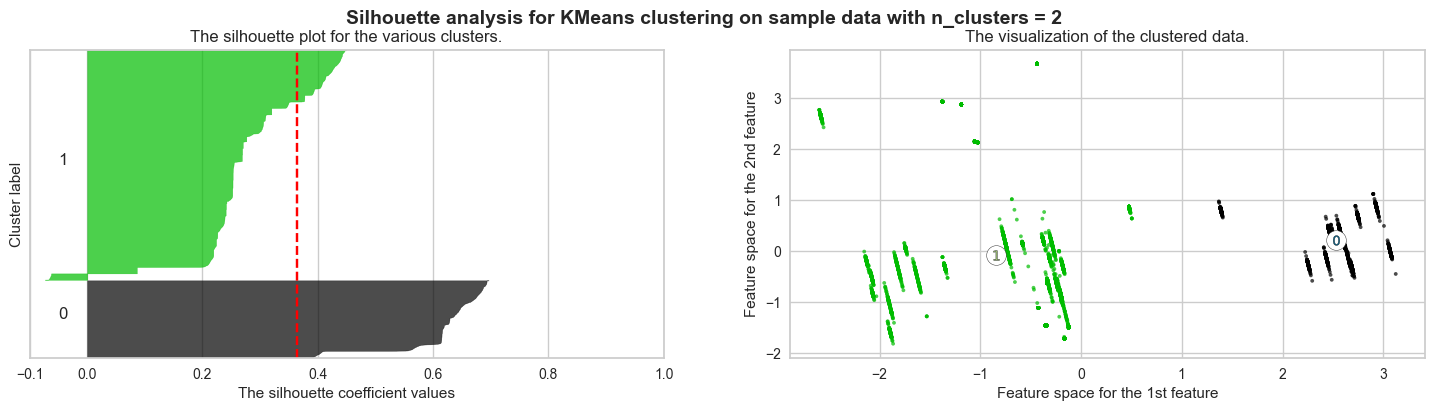

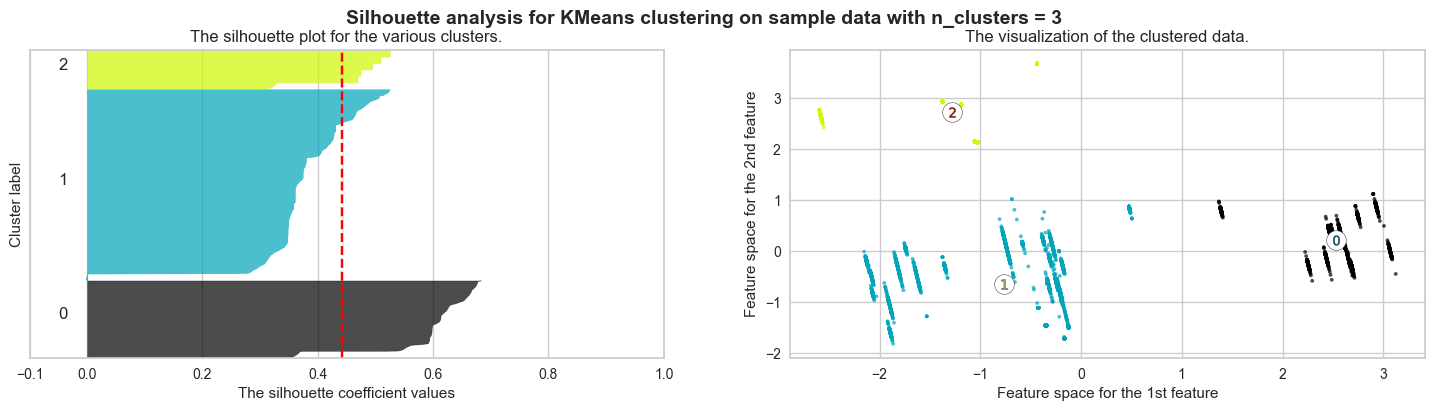

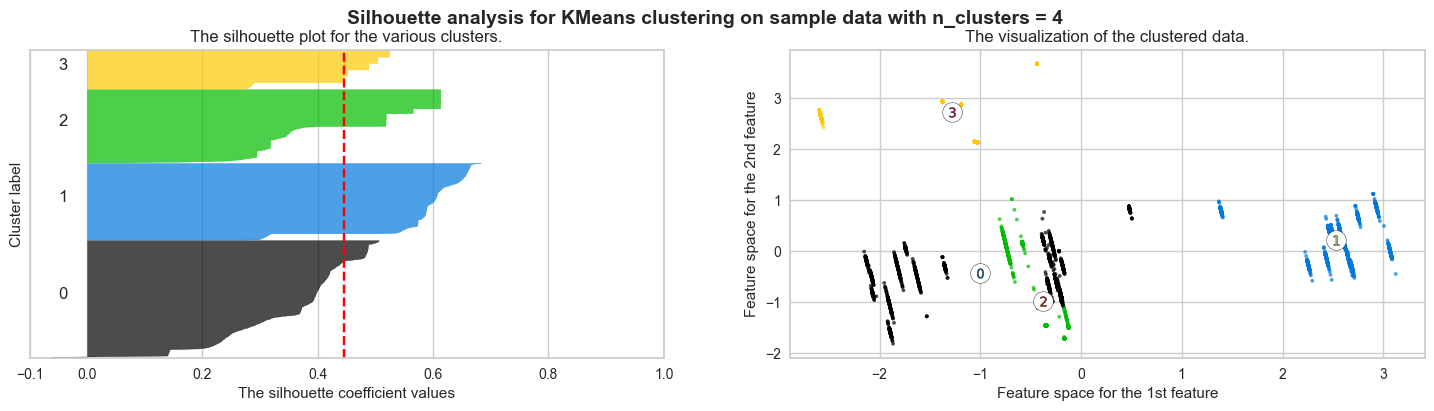

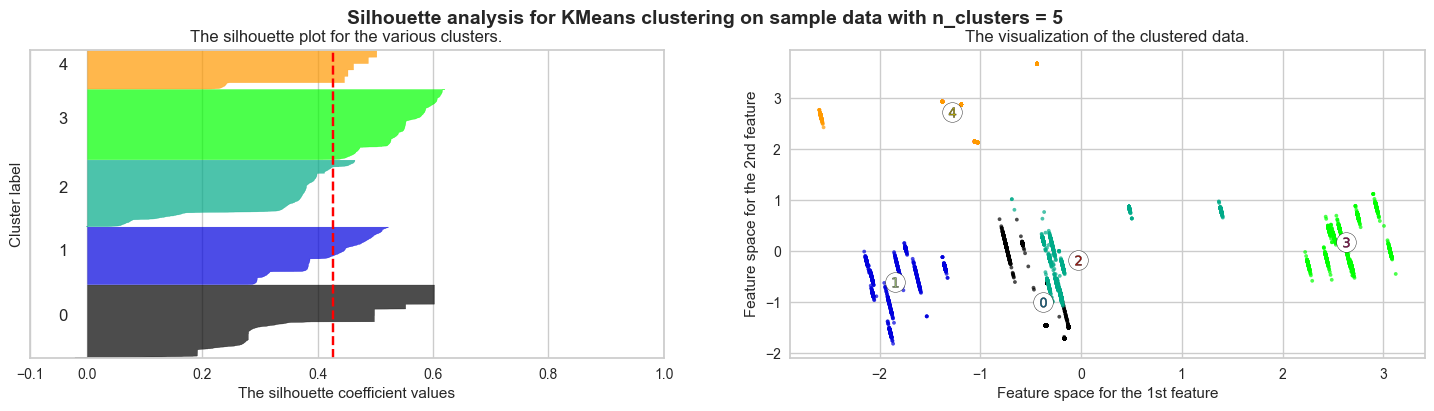

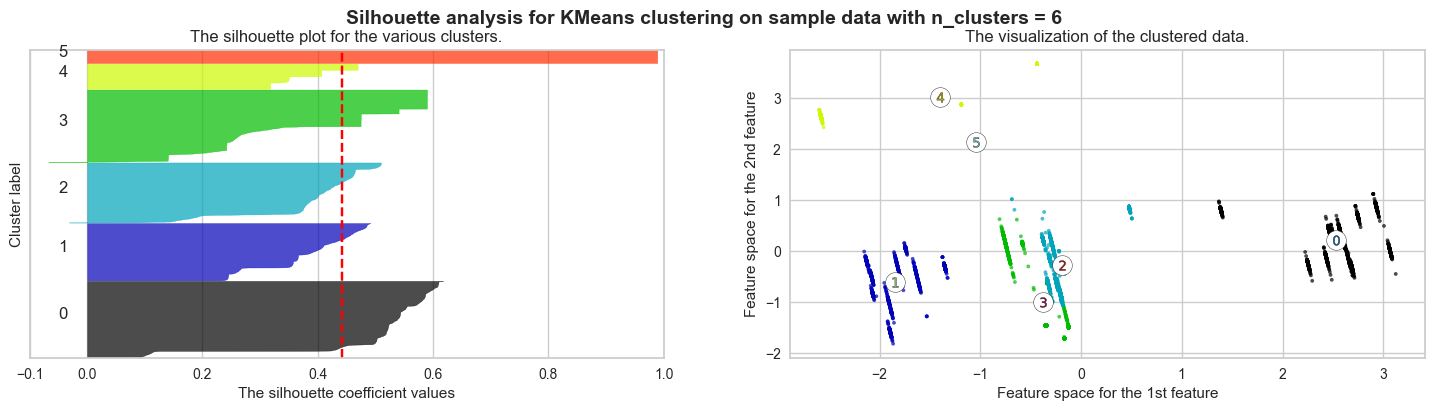

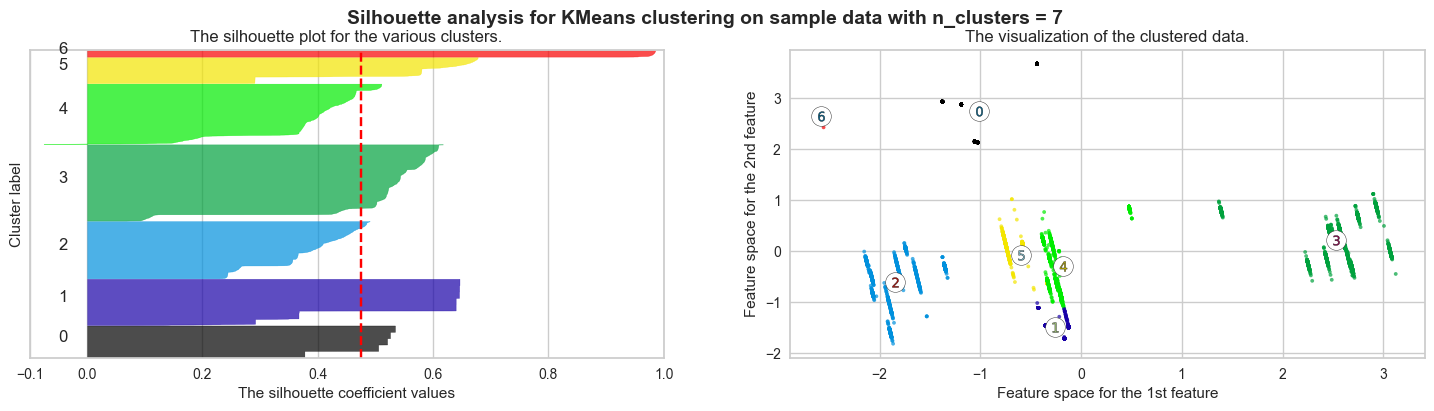

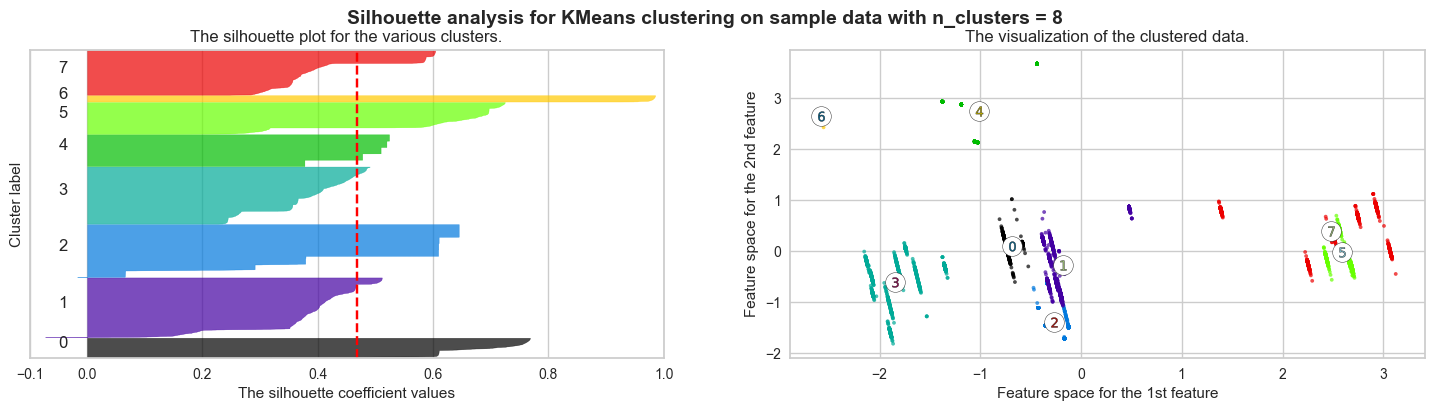

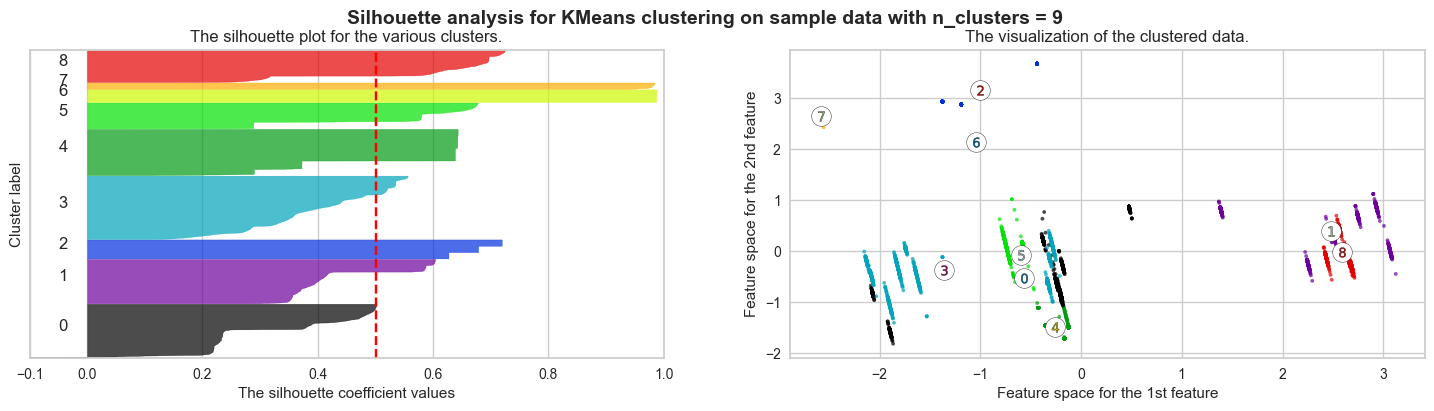

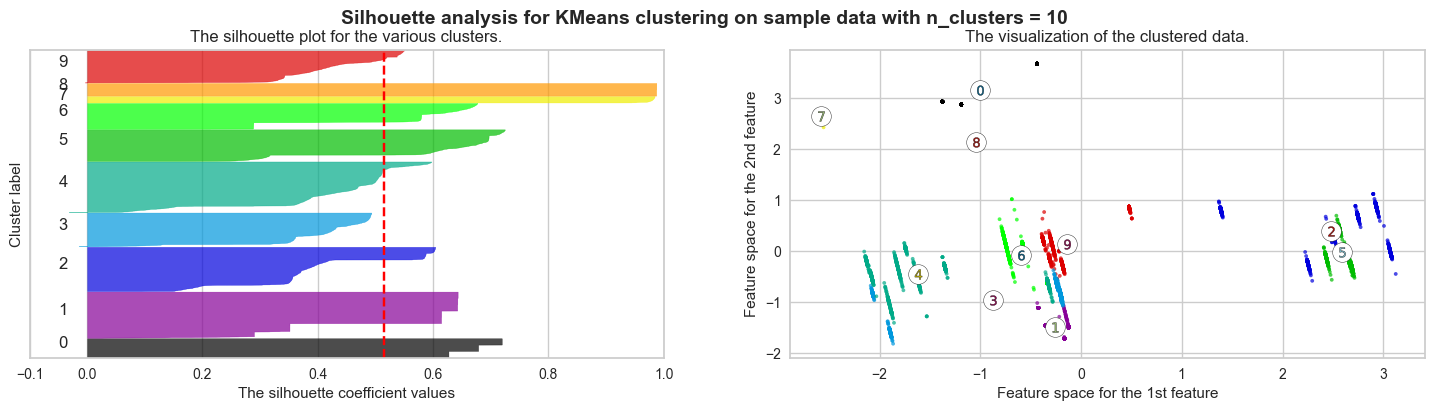

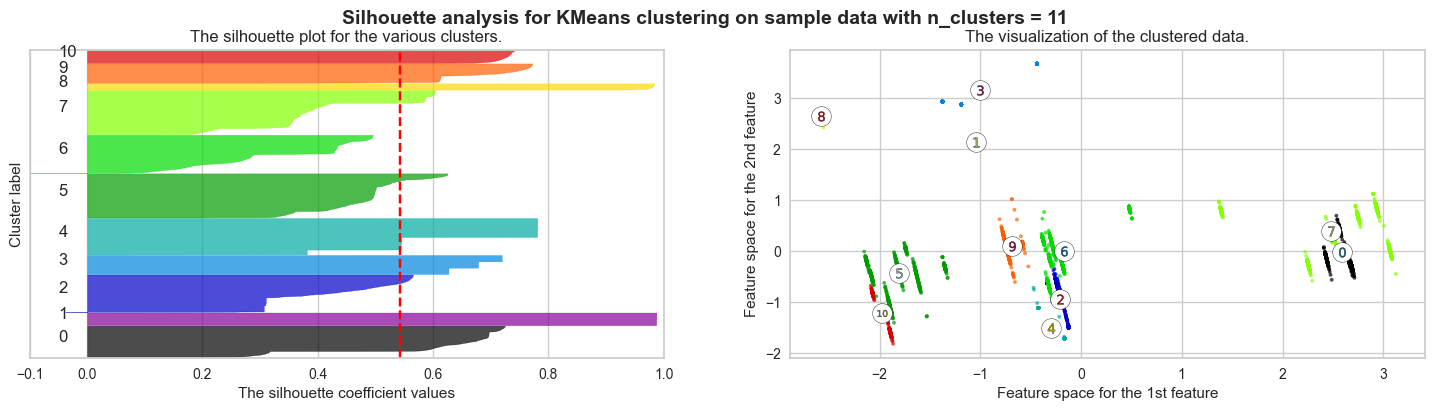

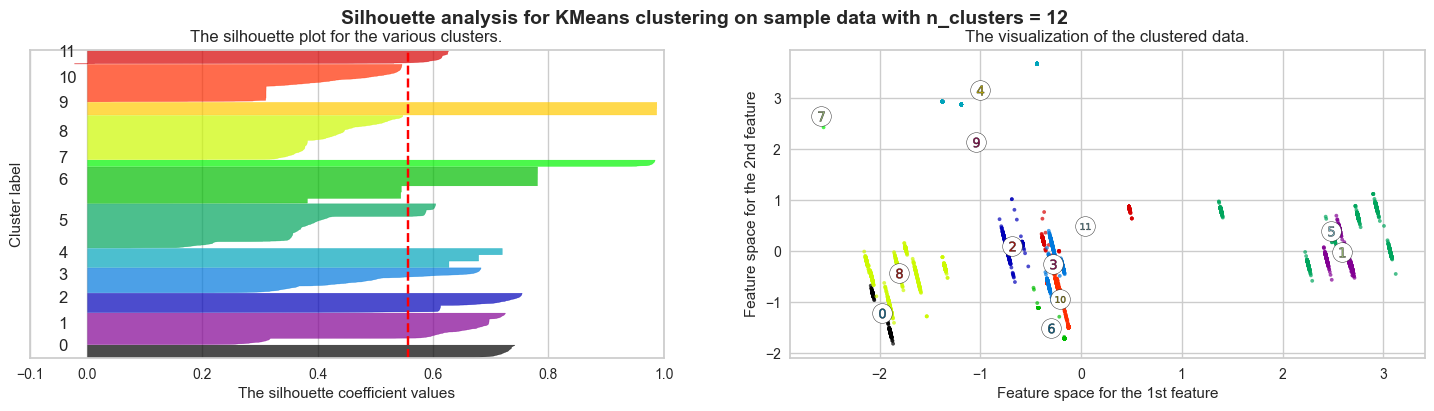

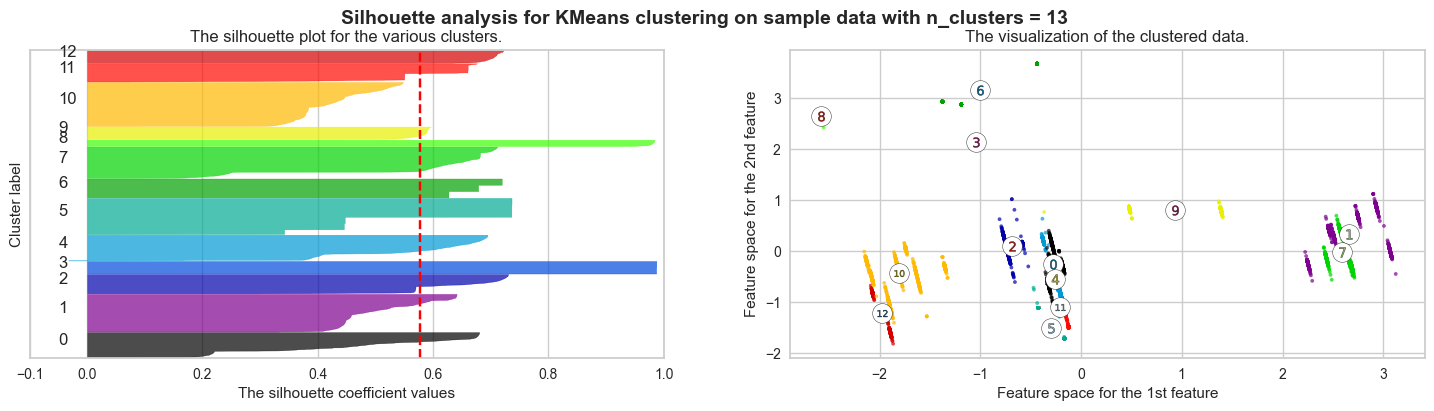

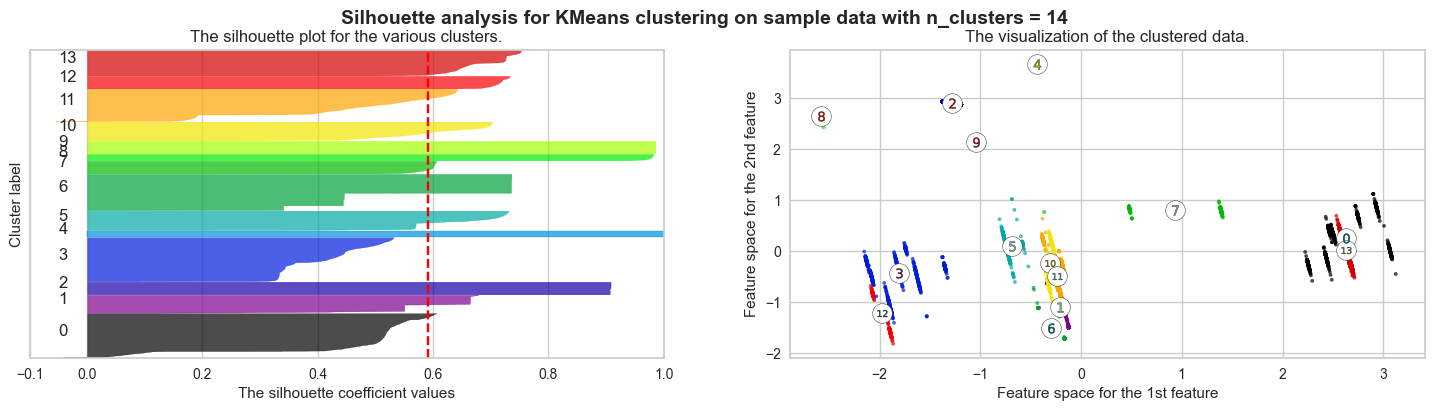

In [46]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_skew_capped_pca, random_state)

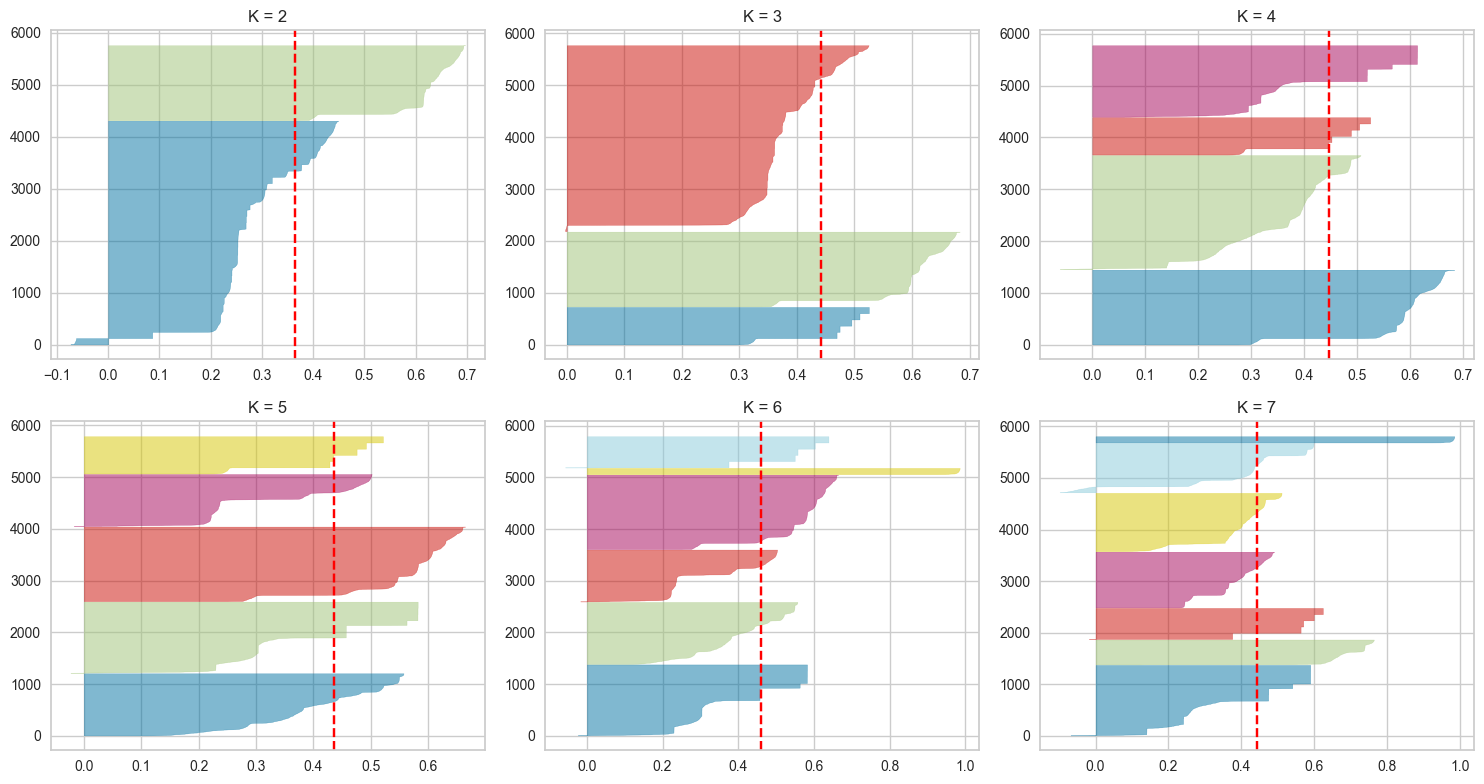

In [47]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(df_skew_capped_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

In [48]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_skew_capped_pca)
pred

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
km.fit(df_skew_capped_pca)

KMeans(n_clusters=4, n_init=10, random_state=6)

In [50]:
# Insert clustering result into original dataset

df['cluster'] = pred
df

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster
0,111100072530,3795.00,2013-08,B2,10600.0,1106,5.581664,95.347843,1
1,111100072530,3664.00,2013-09,B2,10600.0,1106,5.581664,95.347843,1
2,111100072530,4305.00,2013-10,B2,10600.0,1106,5.581664,95.347843,1
3,111100072530,3755.72,2013-11,B2,10600.0,1106,5.581664,95.347843,1
4,111100072530,3452.89,2013-12,B2,10600.0,1106,5.581664,95.347843,1
...,...,...,...,...,...,...,...,...,...
5755,561400171886,2697.86,2023-03,B2,10600.0,3673,-6.130831,106.225094,0
5756,561400171886,2702.84,2023-04,B2,10600.0,3673,-6.130831,106.225094,0
5757,561400171886,2719.31,2023-05,B2,10600.0,3673,-6.130831,106.225094,0
5758,561400171886,2768.72,2023-06,B2,10600.0,3673,-6.130831,106.225094,0


<Axes: >

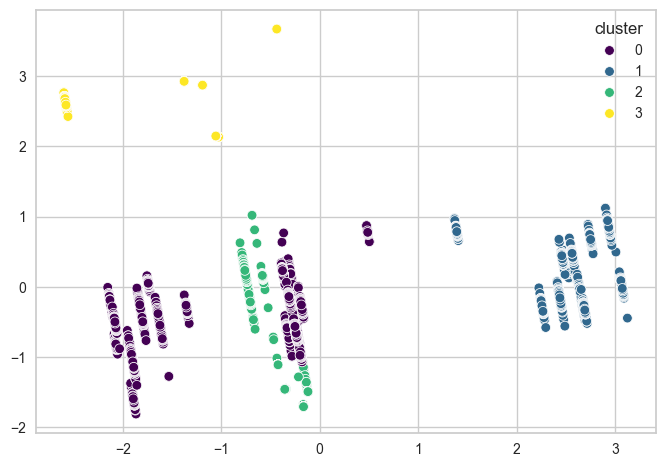

In [51]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_skew_capped_scaler)

anomaly_scaled_pca_2d = pca_2d.fit_transform(df_skew_capped_scaler)

sns.scatterplot(x=anomaly_scaled_pca_2d[:,0], y=anomaly_scaled_pca_2d[:,1], hue=df['cluster'], palette='viridis')


In [52]:
df['daya'].unique()

array([  10600.,   13200.,   33000.,   23000.,  865000.,   16500.,
        415000., 6055000., 7265000., 6600000.])

In [53]:
value_counts = df['cluster'].value_counts()

print(value_counts)

cluster
0    2200
1    1440
2    1378
3     720
Name: count, dtype: int64


In [54]:
filtered_df_cluster_0 = df[df['cluster'] == 0]['daya']
filtered_df_cluster_1 = df[df['cluster'] == 1]['daya']
filtered_df_cluster_2 = df[df['cluster'] == 2]['daya']
filtered_df_cluster_3 = df[df['cluster'] == 3]['daya']
filtered_df_cluster_4 = df[df['cluster'] == 4]['daya']
# filtered_df_cluster_5 = df[df['cluster'] == 5]['daya']

# Mendapatkan nilai unik dari kolom KWH
unique_kwh_values_cluster_0 = filtered_df_cluster_0.unique()
unique_kwh_values_cluster_1 = filtered_df_cluster_1.unique()
unique_kwh_values_cluster_2 = filtered_df_cluster_2.unique()
unique_kwh_values_cluster_3 = filtered_df_cluster_3.unique()
unique_kwh_values_cluster_4 = filtered_df_cluster_4.unique()
# unique_kwh_values_cluster_5 = filtered_df_cluster_5.unique()
# Menampilkan nilai unik
print(unique_kwh_values_cluster_0)
print(unique_kwh_values_cluster_1)
print(unique_kwh_values_cluster_2)
print(unique_kwh_values_cluster_3)
print(unique_kwh_values_cluster_4)
# print(unique_kwh_values_cluster_5)

[10600. 13200.]
[10600. 13200.]
[33000. 23000. 13200. 16500.]
[  10600.  865000.  415000. 6055000. 7265000. 6600000.]
[]


In [55]:
filtered_df_0 = df[(df['cluster'] == 0)]
filtered_df_0

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster
1440,171202402766,1629.50,2013-08,B2,10600.0,1871,-5.367150,105.304000,0
1441,171202402766,1235.00,2013-09,B2,10600.0,1871,-5.367150,105.304000,0
1442,171202402766,1235.00,2013-10,B2,10600.0,1871,-5.367150,105.304000,0
1443,171202402766,1629.50,2013-11,B2,10600.0,1871,-5.367150,105.304000,0
1444,171202402766,1127.00,2013-12,B2,10600.0,1871,-5.367150,105.304000,0
...,...,...,...,...,...,...,...,...,...
5755,561400171886,2697.86,2023-03,B2,10600.0,3673,-6.130831,106.225094,0
5756,561400171886,2702.84,2023-04,B2,10600.0,3673,-6.130831,106.225094,0
5757,561400171886,2719.31,2023-05,B2,10600.0,3673,-6.130831,106.225094,0
5758,561400171886,2768.72,2023-06,B2,10600.0,3673,-6.130831,106.225094,0


In [56]:
print(filtered_df_0['daya'].unique())
print(filtered_df_0['KWH'].unique())

[10600. 13200.]
[1629.5  1235.   1127.   ... 2719.31 2768.72 2717.62]


In [57]:
filtered_df_1 = df[(df['cluster'] == 1)]
filtered_df_1

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster
0,111100072530,3795.00,2013-08,B2,10600.0,1106,5.581664,95.347843,1
1,111100072530,3664.00,2013-09,B2,10600.0,1106,5.581664,95.347843,1
2,111100072530,4305.00,2013-10,B2,10600.0,1106,5.581664,95.347843,1
3,111100072530,3755.72,2013-11,B2,10600.0,1106,5.581664,95.347843,1
4,111100072530,3452.89,2013-12,B2,10600.0,1106,5.581664,95.347843,1
...,...,...,...,...,...,...,...,...,...
1435,144400254457,2092.85,2023-03,B2,10600.0,1509,-1.477231,102.415784,1
1436,144400254457,2075.36,2023-04,B2,10600.0,1509,-1.477231,102.415784,1
1437,144400254457,2187.96,2023-05,B2,10600.0,1509,-1.477231,102.415784,1
1438,144400254457,2172.36,2023-06,B2,10600.0,1509,-1.477231,102.415784,1


In [58]:
print(filtered_df_1['daya'].unique())
print(filtered_df_1['KWH'].unique())

[10600. 13200.]
[3795.   3664.   4305.   ... 2187.96 2172.36 2161.17]


In [59]:
filtered_df_2 = df[(df['cluster'] == 2)]
filtered_df_2

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster
2760,535594377492,3052.00,2013-08,B2,33000.0,3273,-6.906064,107.619990,2
2761,535594377492,2859.00,2013-09,B2,33000.0,3273,-6.906064,107.619990,2
2762,535594377492,3005.00,2013-10,B2,33000.0,3273,-6.906064,107.619990,2
2763,535594377492,2970.00,2013-11,B2,33000.0,3273,-6.906064,107.619990,2
2764,535594377492,2541.00,2013-12,B2,33000.0,3273,-6.906064,107.619990,2
...,...,...,...,...,...,...,...,...,...
4315,538613101608,6233.30,2023-03,B2,23000.0,3201,-6.527696,106.927319,2
4316,538613101608,6232.24,2023-04,B2,23000.0,3201,-6.527696,106.927319,2
4317,538613101608,6233.95,2023-05,B2,23000.0,3201,-6.527696,106.927319,2
4318,538613101608,6233.92,2023-06,B2,23000.0,3201,-6.527696,106.927319,2


In [60]:
print(filtered_df_2['daya'].unique())
print(filtered_df_2['KWH'].unique())

[33000. 23000. 13200. 16500.]
[3052.   2859.   3005.   ... 6233.95 6233.92 6236.54]


In [61]:
filtered_df_3 = df[(df['cluster'] == 3)]
filtered_df_3

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster
1920,411700355709,3026.00,2013-08,L,10600.0,8106,-3.335411,128.356389,3
1921,411700355709,2913.00,2013-09,L,10600.0,8106,-3.335411,128.356389,3
1922,411700355709,2789.69,2013-10,L,10600.0,8106,-3.335411,128.356389,3
1923,411700355709,2668.10,2013-11,L,10600.0,8106,-3.335411,128.356389,3
1924,411700355709,2789.69,2013-12,L,10600.0,8106,-3.335411,128.356389,3
...,...,...,...,...,...,...,...,...,...
5635,548200002404,270.61,2023-03,B3,6600000.0,3674,-6.293889,106.671713,3
5636,548200002404,273.75,2023-04,B3,6600000.0,3674,-6.293889,106.671713,3
5637,548200002404,272.38,2023-05,B3,6600000.0,3674,-6.293889,106.671713,3
5638,548200002404,278.38,2023-06,B3,6600000.0,3674,-6.293889,106.671713,3


In [62]:
print(filtered_df_3['daya'].unique())
print(filtered_df_3['KWH'].unique())

[  10600.  865000.  415000. 6055000. 7265000. 6600000.]
[3026.   2913.   2789.69 2668.1  2783.   2778.   2825.   2666.   2672.
 2801.   2781.   2800.   2894.   2901.   2890.   3000.   3010.   3013.
 3061.   3060.   3162.   2796.01 2744.65 2832.26 2828.79 2983.39 2751.66
 2865.22 2791.61 2799.99 2950.26 2924.07 2798.84 2786.97 2744.54 2889.89
 2893.71 2820.26 2829.31 2874.04 2790.61 2800.22 2946.87 2901.72 2755.05
 2941.42 2810.42 2759.79 2766.96 2810.45 2869.2  2951.66 2824.57 2820.73
 2826.61 2831.5  2867.37 2808.37 2782.74 2810.5  2846.85 2810.52 2752.18
 2771.36 2835.3  2922.5  2804.2  2930.93 2768.12 2825.26 2793.89 2926.27
 2864.6  2840.8  2886.51 2866.47 2805.42 2835.97 2924.03 2847.06 2937.24
 2887.91 2768.93 2786.51 2817.81 2899.94 2825.07 2901.89 2844.3  2863.
 2865.01 2816.42 2873.77 2900.96 2851.39 2832.03 2772.49 2850.34 2890.96
 2865.99 2799.23 2768.09 2765.53 2806.85 2827.87 2916.35 2825.67 2861.99
 2880.82 2827.78 2823.54 2786.92 2903.73 2794.6  2867.65 2925.84  264.
  2

In [63]:
filtered_df = df[df['cluster'] == 0][['KWH','daya']]

# Tampilkan hasil
print(filtered_df)

          KWH     daya
1440  1629.50  10600.0
1441  1235.00  10600.0
1442  1235.00  10600.0
1443  1629.50  10600.0
1444  1127.00  10600.0
...       ...      ...
5755  2697.86  10600.0
5756  2702.84  10600.0
5757  2719.31  10600.0
5758  2768.72  10600.0
5759  2717.62  10600.0

[2200 rows x 2 columns]


In [64]:
# import pandas as pd


# # Filter baris dengan cluster = 0 dan pilih kolom KWH dan daya
# filtered_df = df[(df['cluster'] == 4) & (df['daya'].isin([10600]))][['KWH', 'daya', 'tarif']]

# # Tampilkan hasil
# print(filtered_df)


In [65]:
filtered_df = df[(df['cluster'] == 4) & (df['daya'] == 10600)]
filtered_df

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster


In [66]:
filtered_df = df[(df['cluster'] == 4)]
filtered_df

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster


In [67]:
# filtered_df.loc[:, 'cluster'] = 3
# df.update(filtered_df)
# df

In [68]:
filtered_df_cluster_0 = df[df['cluster'] == 0]['daya']
filtered_df_cluster_1 = df[df['cluster'] == 1]['daya']
filtered_df_cluster_2 = df[df['cluster'] == 2]['daya']
filtered_df_cluster_3 = df[df['cluster'] == 3]['daya']
filtered_df_cluster_4 = df[df['cluster'] == 4]['daya']
# filtered_df_cluster_5 = df[df['cluster'] == 5]['daya']

# Mendapatkan nilai unik dari kolom KWH
unique_kwh_values_cluster_0 = filtered_df_cluster_0.unique()
unique_kwh_values_cluster_1 = filtered_df_cluster_1.unique()
unique_kwh_values_cluster_2 = filtered_df_cluster_2.unique()
unique_kwh_values_cluster_3 = filtered_df_cluster_3.unique()
unique_kwh_values_cluster_4 = filtered_df_cluster_4.unique()
# unique_kwh_values_cluster_5 = filtered_df_cluster_5.unique()
# Menampilkan nilai unik
print(unique_kwh_values_cluster_0)
print(unique_kwh_values_cluster_1)
print(unique_kwh_values_cluster_2)
print(unique_kwh_values_cluster_3)
print(unique_kwh_values_cluster_4)
# print(unique_kwh_values_cluster_5)

[10600. 13200.]
[10600. 13200.]
[33000. 23000. 13200. 16500.]
[  10600.  865000.  415000. 6055000. 7265000. 6600000.]
[]


In [69]:
filtered_df['daya'].unique()

array([], dtype=float64)

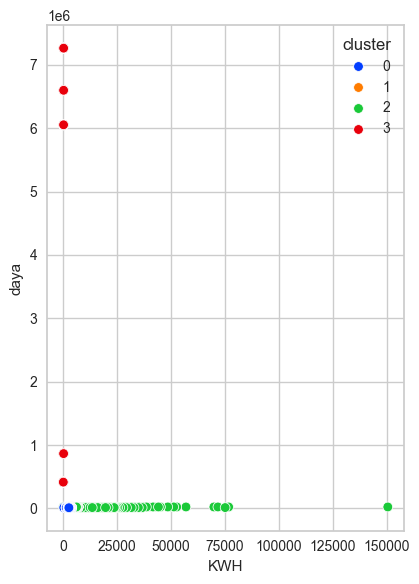

In [70]:
plt.figure(figsize=(12, 6))  

# Scatterplot 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="KWH", y="daya",hue="cluster", palette="bright")
plt.title('')

# Scatterplot 2
# plt.subplot(1, 3, 2)
# sns.scatterplot(data=df, x="KWH", y="tarif",hue="cluster", palette="bright")
# plt.title('')

# # Scatterplot 3
# plt.subplot(1, 3, 3)
# sns.scatterplot(data=df, x="daya", y="tarif",hue="cluster", palette="bright")
# plt.title('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


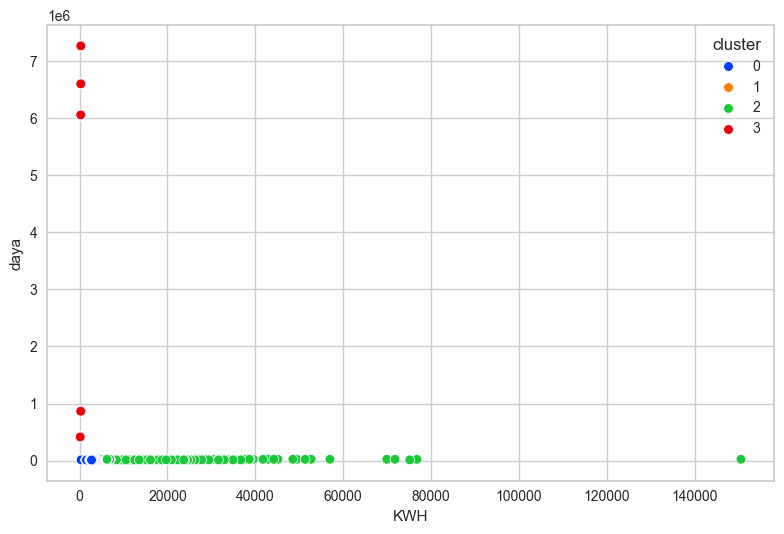

In [71]:
# Scatterplot 1
plt.subplot(1, 1, 1)
sns.scatterplot(data=df, x="KWH", y="daya",hue="cluster", palette="bright")
plt.title('')
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [72]:
filtered_df = df[(df['cluster'] == 3)]
filtered_df

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster
1920,411700355709,3026.00,2013-08,L,10600.0,8106,-3.335411,128.356389,3
1921,411700355709,2913.00,2013-09,L,10600.0,8106,-3.335411,128.356389,3
1922,411700355709,2789.69,2013-10,L,10600.0,8106,-3.335411,128.356389,3
1923,411700355709,2668.10,2013-11,L,10600.0,8106,-3.335411,128.356389,3
1924,411700355709,2789.69,2013-12,L,10600.0,8106,-3.335411,128.356389,3
...,...,...,...,...,...,...,...,...,...
5635,548200002404,270.61,2023-03,B3,6600000.0,3674,-6.293889,106.671713,3
5636,548200002404,273.75,2023-04,B3,6600000.0,3674,-6.293889,106.671713,3
5637,548200002404,272.38,2023-05,B3,6600000.0,3674,-6.293889,106.671713,3
5638,548200002404,278.38,2023-06,B3,6600000.0,3674,-6.293889,106.671713,3


In [73]:
# # Scatterplot 3
# plt.subplot(1, 1, 1)
# sns.scatterplot(data=df, x="daya", y="tarif",hue="cluster", palette="bright")
# plt.title('')

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

In [74]:
# plt.subplot(1, 1, 1)
# sns.scatterplot(data=df, x="KWH", y="tarif",hue="cluster", palette="bright")
# plt.title('')

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5738 entries, 0 to 5759
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5738 non-null   int64  
 1   KWH          5738 non-null   float64
 2   BLTH         5738 non-null   object 
 3   tarif        5738 non-null   object 
 4   daya         5738 non-null   float64
 5   city_id      5738 non-null   int64  
 6   latitude     5738 non-null   float64
 7   longitude    5738 non-null   float64
 8   cluster      5738 non-null   int32  
dtypes: float64(4), int32(1), int64(2), object(2)
memory usage: 425.9+ KB


In [76]:
df['customer_id'].unique()

array([111100072530, 111100159959, 114400016975, 120040933837,
       122100741409, 122130592805, 122190377978, 124100765174,
       125110689626, 126150840784, 127100190835, 144400254457,
       171202402766, 321110332002, 324500151839, 326200275960,
       411700355709, 424100830432, 431000870310, 431500268836,
       433020014225, 433500060517, 437400488111, 535594377492,
       535596216725, 535596237775, 537114669029, 537114924897,
       537115593788, 537115594150, 537115603552, 538610817524,
       538610873606, 538612854809, 538613044802, 538613101608,
       543300370543, 543801545639, 544204020851, 544300116656,
       545301431979, 546106677897, 546600776450, 546601023474,
       546601248661, 547500271371, 548200002404, 561400171886],
      dtype=int64)

In [77]:
# df.to_csv('clusteringdaya.csv', index=False)

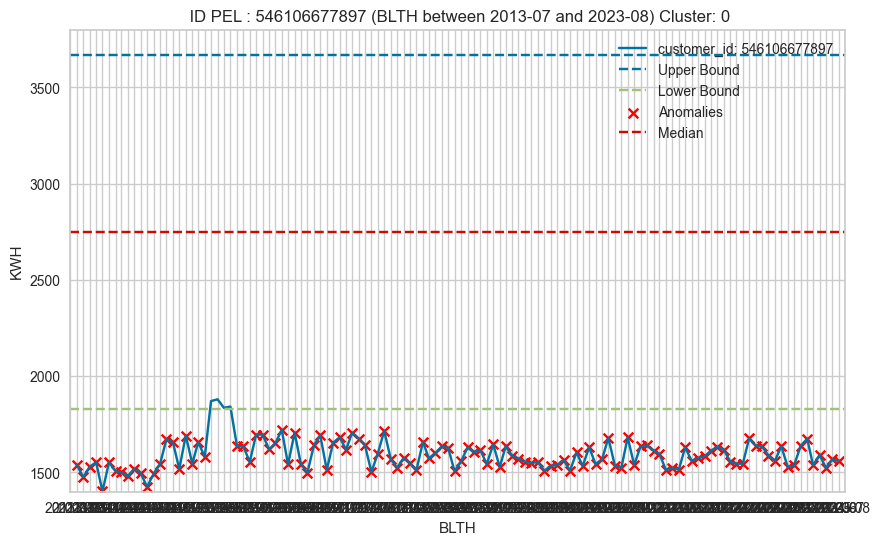

Data for one year before 2013-07:
Empty DataFrame
Columns: [BLTH, KWH, customer_id]
Index: []
Median for one year before 2013-07: 2747.62
Median Absolute Deviation : 367.855
Upper bound for the specified period: 3667.2574999999997
Lower bound for the specified period: 1827.9824999999998


In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

cluster = 0
customer_ids = [546106677897]
start_date = '2013-07'
end_date = '2023-08'
one_year_before_start_date = (pd.to_datetime(start_date) - pd.DateOffset(years=1)).strftime('%Y-%m')

# Convert 'BLTH' values to datetime before filtering
df['BLTH'] = pd.to_datetime(df['BLTH'])

df_one_year_before = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(one_year_before_start_date), pd.to_datetime(start_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Calculate median and MAD for one year before the specified period
median_one_year_before = df[df['cluster'] == cluster]['KWH'].median()
mad_one_year_before = np.median(np.abs(df[df['cluster'] == cluster]['KWH'] - median_one_year_before))

# Set the threshold for the bounds (e.g., 1.5 for MAD threshold)
threshold = 2.5

# Calculate upper and lower bounds for the specified period using the MAD from one year before
upper_bound_specified_period = median_one_year_before + (threshold * mad_one_year_before)
lower_bound_specified_period = median_one_year_before - (threshold * mad_one_year_before)

# Filter data for the specified period
df_specified_period = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(start_date), pd.to_datetime(end_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Identify anomalies based on your criteria (e.g., values outside the bounds)
anomalies_specified_period = df_specified_period[(df_specified_period['KWH'] > upper_bound_specified_period) | 
                                                 (df_specified_period['KWH'] < lower_bound_specified_period)]

# Plot the data for the specified period
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'y']
for i, customer_id in enumerate(customer_ids):
    data = df_specified_period[df_specified_period['customer_id'] == customer_id]
    plt.plot(data['BLTH'], data['KWH'], label=f'customer_id: {customer_id}', color=colors[i])

plt.axhline(upper_bound_specified_period, color='b', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound_specified_period, color='g', linestyle='--', label='Lower Bound')

# Check if anomalies DataFrame is not empty before plotting
if not anomalies_specified_period.empty:
    plt.scatter(anomalies_specified_period['BLTH'], anomalies_specified_period['KWH'], color='red', marker='x', label='Anomalies')

# Plot the median value
plt.axhline(median_one_year_before, color='r', linestyle='--', label='Median')

min_kwh = df[df['cluster'] == cluster]['KWH'].min()
max_kwh = df[df['cluster'] == cluster]['KWH'].max()
plt.ylim(1400, 3800) # Adjust the y-axis range
title = f' ID PEL : {customer_id} (BLTH between {start_date} and {end_date}) Cluster: {cluster}'
plt.title(title)

plt.xlabel('BLTH')
plt.ylabel('KWH')
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.legend()
plt.show()

print(f'Data for one year before {start_date}:')
print(df_one_year_before)
print(f'Median for one year before {start_date}: {median_one_year_before}')
print(f'Median Absolute Deviation : {mad_one_year_before}')
print(f'Upper bound for the specified period: {upper_bound_specified_period}')
print(f'Lower bound for the specified period: {lower_bound_specified_period}')

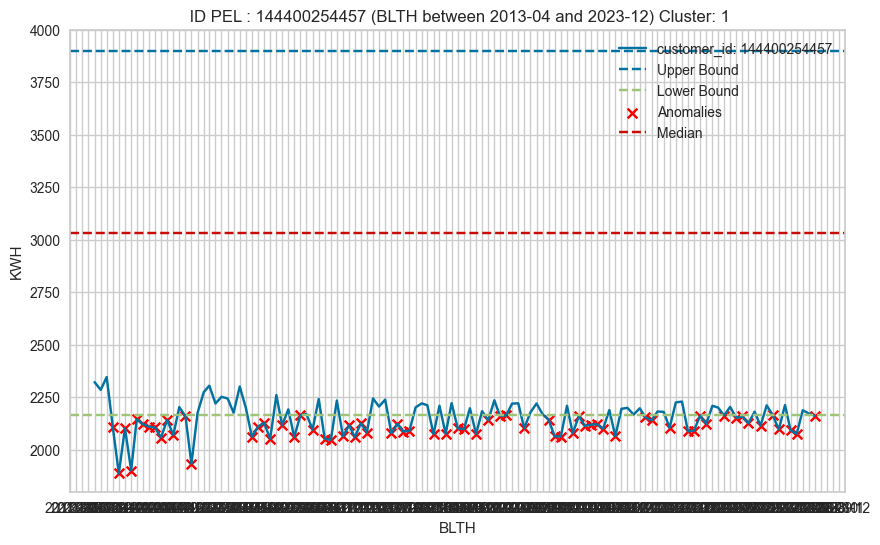

Data for one year before 2013-04:
Empty DataFrame
Columns: [BLTH, KWH, customer_id]
Index: []
Median for one year before 2013-04: 3032.325
Median Absolute Deviation for one year before 2013-04: 346.18499999999995
Upper bound for the specified period: 3897.7874999999995
Lower bound for the specified period: 2166.8625


In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

cluster = 1
customer_ids = [144400254457]
start_date = '2013-04'
end_date = '2023-12'
one_year_before_start_date = (pd.to_datetime(start_date) - pd.DateOffset(years=1)).strftime('%Y-%m')

# Convert 'BLTH' values to datetime before filtering
df['BLTH'] = pd.to_datetime(df['BLTH'])

df_one_year_before = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(one_year_before_start_date), pd.to_datetime(start_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Calculate median and MAD for one year before the specified period
median_one_year_before = df[df['cluster'] == cluster]['KWH'].median()
mad_one_year_before = np.median(np.abs(df[df['cluster'] == cluster]['KWH'] - median_one_year_before))

# Set the threshold for the bounds (e.g., 1.5 for MAD threshold)
threshold = 2.5

# Calculate upper and lower bounds for the specified period using the MAD from one year before
upper_bound_specified_period = median_one_year_before + (threshold * mad_one_year_before)
lower_bound_specified_period = median_one_year_before - (threshold * mad_one_year_before)

# Filter data for the specified period
df_specified_period = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(start_date), pd.to_datetime(end_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Identify anomalies based on your criteria (e.g., values outside the bounds)
anomalies_specified_period = df_specified_period[(df_specified_period['KWH'] > upper_bound_specified_period) | 
                                                 (df_specified_period['KWH'] < lower_bound_specified_period)]

# Plot the data for the specified period
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'y']
for i, customer_id in enumerate(customer_ids):
    data = df_specified_period[df_specified_period['customer_id'] == customer_id]
    plt.plot(data['BLTH'], data['KWH'], label=f'customer_id: {customer_id}', color=colors[i])

plt.axhline(upper_bound_specified_period, color='b', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound_specified_period, color='g', linestyle='--', label='Lower Bound')

# Check if anomalies DataFrame is not empty before plotting
if not anomalies_specified_period.empty:
    plt.scatter(anomalies_specified_period['BLTH'], anomalies_specified_period['KWH'], color='red', marker='x', label='Anomalies')

# Plot the median value
plt.axhline(median_one_year_before, color='r', linestyle='--', label='Median')

min_kwh = df[df['cluster'] == cluster]['KWH'].min()
max_kwh = df[df['cluster'] == cluster]['KWH'].max()
plt.ylim(1800, 4000) # Adjust the y-axis range
title = f' ID PEL : {customer_id} (BLTH between {start_date} and {end_date}) Cluster: {cluster}'
plt.title(title)

plt.xlabel('BLTH')
plt.ylabel('KWH')
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.legend()
plt.show()

print(f'Data for one year before {start_date}:')
print(df_one_year_before)
print(f'Median for one year before {start_date}: {median_one_year_before}')
print(f'Median Absolute Deviation for one year before {start_date}: {mad_one_year_before}')
print(f'Upper bound for the specified period: {upper_bound_specified_period}')
print(f'Lower bound for the specified period: {lower_bound_specified_period}')

In [80]:
filtered_df_A = df[(df['cluster'] == 2)]
filtered_df_A['customer_id'].unique()

array([535594377492, 535596216725, 537114669029, 537114924897,
       537115593788, 537115594150, 537115603552, 538610817524,
       538610873606, 538612854809, 538613044802, 538613101608],
      dtype=int64)

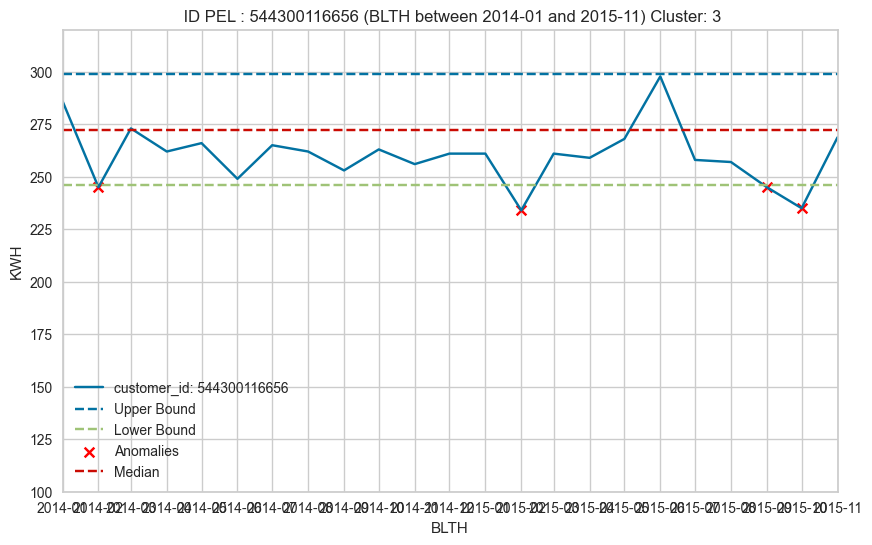

Data for one year before 2014-01:
           BLTH    KWH   customer_id
4685 2014-01-01  286.0  544300116656
Median for one year before 2014-01: 272.485
Median Absolute Deviation for one year before 2014-01: 10.514999999999986
Upper bound for the specified period: 298.7725
Lower bound for the specified period: 246.19750000000005


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

cluster = 3
customer_ids = [544300116656]
start_date = '2014-01'
end_date = '2015-11'
one_year_before_start_date = (pd.to_datetime(start_date) - pd.DateOffset(years=0)).strftime('%Y-%m')

# Convert 'BLTH' values to datetime before filtering
df['BLTH'] = pd.to_datetime(df['BLTH'])

df_one_year_before = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(one_year_before_start_date), pd.to_datetime(start_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Calculate median and MAD for one year before the specified period
median_one_year_before = df[df['cluster'] == cluster]['KWH'].median()
mad_one_year_before = np.median(np.abs(df[df['cluster'] == cluster]['KWH'] - median_one_year_before))

# Set the threshold for the bounds (e.g., 1.5 for MAD threshold)
threshold = 2.5

# Calculate upper and lower bounds for the specified period using the MAD from one year before
upper_bound_specified_period = median_one_year_before + (threshold * mad_one_year_before)
lower_bound_specified_period = median_one_year_before - (threshold * mad_one_year_before)

# Filter data for the specified period
df_specified_period = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(start_date), pd.to_datetime(end_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Identify anomalies based on your criteria (e.g., values outside the bounds)
anomalies_specified_period = df_specified_period[(df_specified_period['KWH'] > upper_bound_specified_period) | 
                                                 (df_specified_period['KWH'] < lower_bound_specified_period)]

# Plot the data for the specified period
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'y']
for i, customer_id in enumerate(customer_ids):
    data = df_specified_period[df_specified_period['customer_id'] == customer_id]
    plt.plot(data['BLTH'], data['KWH'], label=f'customer_id: {customer_id}', color=colors[i])

plt.axhline(upper_bound_specified_period, color='b', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound_specified_period, color='g', linestyle='--', label='Lower Bound')

# Check if anomalies DataFrame is not empty before plotting
if not anomalies_specified_period.empty:
    plt.scatter(anomalies_specified_period['BLTH'], anomalies_specified_period['KWH'], color='red', marker='x', label='Anomalies')

# Plot the median value
plt.axhline(median_one_year_before, color='r', linestyle='--', label='Median')

min_kwh = df[df['cluster'] == cluster]['KWH'].min()
max_kwh = df[df['cluster'] == cluster]['KWH'].max()
plt.ylim(100, 320) # Adjust the y-axis range
title = f' ID PEL : {customer_id} (BLTH between {start_date} and {end_date}) Cluster: {cluster}'
plt.title(title)

plt.xlabel('BLTH')
plt.ylabel('KWH')
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.legend()
plt.show()

print(f'Data for one year before {start_date}:')
print(df_one_year_before)
print(f'Median for one year before {start_date}: {median_one_year_before}')
print(f'Median Absolute Deviation for one year before {start_date}: {mad_one_year_before}')
print(f'Upper bound for the specified period: {upper_bound_specified_period}')
print(f'Lower bound for the specified period: {lower_bound_specified_period}')

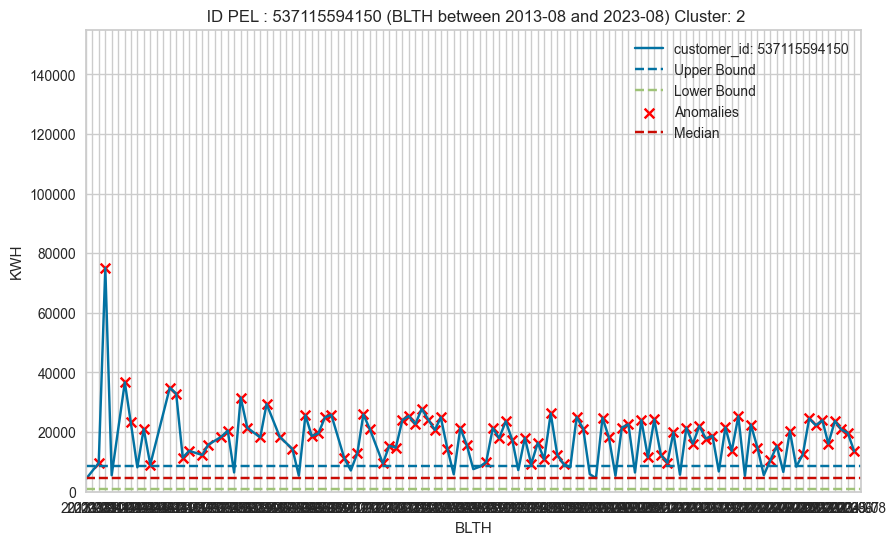

Data for one year before 2013-08:
           BLTH     KWH   customer_id
3480 2013-08-01  4181.0  537115594150
Median for one year before 2013-08: 4695.889999999999
Median Absolute Deviation for one year before 2013-08: 1534.2150000000006
Upper bound for the specified period: 8531.427500000002
Lower bound for the specified period: 860.3524999999981


In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

cluster = 2
customer_ids = [537115594150]
start_date = '2013-08'
end_date = '2023-08'
one_year_before_start_date = (pd.to_datetime(start_date) - pd.DateOffset(years=1)).strftime('%Y-%m')

# Convert 'BLTH' values to datetime before filtering
df['BLTH'] = pd.to_datetime(df['BLTH'])

df_one_year_before = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(one_year_before_start_date), pd.to_datetime(start_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Calculate median and MAD for one year before the specified period
median_one_year_before = df[df['cluster'] == cluster]['KWH'].median()
mad_one_year_before = np.median(np.abs(df[df['cluster'] == cluster]['KWH'] - median_one_year_before))

# Set the threshold for the bounds (e.g., 1.5 for MAD threshold)
threshold = 2.5

# Calculate upper and lower bounds for the specified period using the MAD from one year before
upper_bound_specified_period = median_one_year_before + (threshold * mad_one_year_before)
lower_bound_specified_period = median_one_year_before - (threshold * mad_one_year_before)

# Filter data for the specified period
df_specified_period = df.loc[
    (df['cluster'] == cluster) & 
    (df['customer_id'].isin(customer_ids)) & 
    (df['BLTH'].between(pd.to_datetime(start_date), pd.to_datetime(end_date))), 
    ['BLTH', 'KWH', 'customer_id']
]

# Identify anomalies based on your criteria (e.g., values outside the bounds)
anomalies_specified_period = df_specified_period[(df_specified_period['KWH'] > upper_bound_specified_period) | 
                                                 (df_specified_period['KWH'] < lower_bound_specified_period)]

# Plot the data for the specified period
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'y']
for i, customer_id in enumerate(customer_ids):
    data = df_specified_period[df_specified_period['customer_id'] == customer_id]
    plt.plot(data['BLTH'], data['KWH'], label=f'customer_id: {customer_id}', color=colors[i])

plt.axhline(upper_bound_specified_period, color='b', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound_specified_period, color='g', linestyle='--', label='Lower Bound')

# Check if anomalies DataFrame is not empty before plotting
if not anomalies_specified_period.empty:
    plt.scatter(anomalies_specified_period['BLTH'], anomalies_specified_period['KWH'], color='red', marker='x', label='Anomalies')

# Plot the median value
plt.axhline(median_one_year_before, color='r', linestyle='--', label='Median')

min_kwh = df[df['cluster'] == cluster]['KWH'].min()
max_kwh = df[df['cluster'] == cluster]['KWH'].max()
plt.ylim(0, 155000) # Adjust the y-axis range
title = f' ID PEL : {customer_id} (BLTH between {start_date} and {end_date}) Cluster: {cluster}'
plt.title(title)

plt.xlabel('BLTH')
plt.ylabel('KWH')
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.legend()
plt.show()

print(f'Data for one year before {start_date}:')
print(df_one_year_before)
print(f'Median for one year before {start_date}: {median_one_year_before}')
print(f'Median Absolute Deviation for one year before {start_date}: {mad_one_year_before}')
print(f'Upper bound for the specified period: {upper_bound_specified_period}')
print(f'Lower bound for the specified period: {lower_bound_specified_period}')

In [83]:
# Assuming merged_df0 is your DataFrame and 'customer_id' is the column name
result = df[df['customer_id'] == 537114669029]
result.head(10)

,customer_id,KWH,BLTH,tarif,daya,city_id,latitude,longitude,cluster
3120,537114669029,4237.000,2013-08-01,B2,23000.0,3275,-6.239295,106.985485,2
3121,537114669029,3804.000,2013-09-01,B2,23000.0,3275,-6.239295,106.985485,2
3122,537114669029,10526.000,2013-10-01,B2,23000.0,3275,-6.239295,106.985485,2
3123,537114669029,150466.875,2013-11-01,B2,23000.0,3275,-6.239295,106.985485,2
3126,537114669029,76737.460,2014-02-01,B2,23000.0,3275,-6.239295,106.985485,2
3127,537114669029,41863.380,2014-03-01,B2,23000.0,3275,-6.239295,106.985485,2
3131,537114669029,69888.930,2014-07-01,B2,23000.0,3275,-6.239295,106.985485,2
3132,537114669029,39515.030,2014-08-01,B2,23000.0,3275,-6.239295,106.985485,2
3133,537114669029,71752.830,2014-09-01,B2,23000.0,3275,-6.239295,106.985485,2
3134,537114669029,15808.430,2014-10-01,B2,23000.0,3275,-6.239295,106.985485,2


In [84]:
# Assuming merged_df0 is your DataFrame and 'customer_id' is the column name
result = df[df['cluster'] == 3]
result['customer_id'].unique()

array([411700355709, 535596237775, 543300370543, 544300116656,
       547500271371, 548200002404], dtype=int64)

In [85]:
upper_bound = 8531.427500000002
lower_bound = 860.3524999999981
cluster_2_mask = df['cluster'] == 2
kwh_mask_upper2 = df['KWH'] > upper_bound
kwh_mask_lower2 = df['KWH'] < lower_bound

# Mendapatkan customer_ids yang memenuhi kondisi
customer_ids2_upper = df.loc[cluster_2_mask & kwh_mask_upper2, ['customer_id','KWH', 'BLTH']]
customer_ids2_lower = df.loc[cluster_2_mask & kwh_mask_lower2, ['customer_id','KWH', 'BLTH']]

merged_df2 = pd.concat([customer_ids2_upper, customer_ids2_lower])

print("Anomaly Data Cluster 2 :")
merged_df2

Anomaly Data Cluster 2 :


,customer_id,KWH,BLTH
3122,537114669029,10526.000,2013-10-01
3123,537114669029,150466.875,2013-11-01
3126,537114669029,76737.460,2014-02-01
3127,537114669029,41863.380,2014-03-01
3131,537114669029,69888.930,2014-07-01
...,...,...,...
3596,537115594150,23702.340,2023-04-01
3597,537115594150,20894.190,2023-05-01
3598,537115594150,19697.610,2023-06-01
3599,537115594150,13559.140,2023-07-01


In [86]:
# Hitung jumlah unik 'customer_id' dan buat DataFrame baru
unique_customers_df2 = merged_df2.groupby('customer_id').size().reset_index(name='count')

print("2 dari 12 Customer ID yang mengalami Anomaly pada cluster 2:")
unique_customers_df2


2 dari 12 Customer ID yang mengalami Anomaly pada cluster 2:


,customer_id,count
0,537114669029,83
1,537115594150,88


In [87]:
A_2 = merged_df2['KWH'].count()
A_21 = merged_df2['customer_id'].unique()

print(A_2)
print(A_21)


171
[537114669029 537115594150]


In [88]:
upper_bound = 298.7725
lower_bound = 246.19750000000005
cluster_3_mask = df['cluster'] == 3

kwh_mask_upper3 = df['KWH'] > upper_bound
kwh_mask_lower3= df['KWH'] < lower_bound

# Mendapatkan customer_ids yang memenuhi kondisi
customer_ids3_upper = df.loc[cluster_3_mask & kwh_mask_upper3, ['customer_id','KWH', 'BLTH']]
customer_ids3_lower = df.loc[cluster_3_mask & kwh_mask_lower3, ['customer_id','KWH', 'BLTH']]

merged_df3 = pd.concat([customer_ids3_upper, customer_ids3_lower])

print("Anomaly Data Cluster: 3")
merged_df3

Anomaly Data Cluster: 3


,customer_id,KWH,BLTH
1920,411700355709,3026.00,2013-08-01
1921,411700355709,2913.00,2013-09-01
1922,411700355709,2789.69,2013-10-01
1923,411700355709,2668.10,2013-11-01
1924,411700355709,2789.69,2013-12-01
...,...,...,...
4439,543300370543,135.51,2023-07-01
4686,544300116656,245.00,2014-02-01
4698,544300116656,234.00,2015-02-01
4705,544300116656,245.00,2015-09-01


In [89]:
# Hitung jumlah unik 'customer_id' dan buat DataFrame baru
unique_customers_df3 = merged_df3.groupby('customer_id').size().reset_index(name='count')

print("4 dari 6 Customer ID yang mengalami Anomaly pada cluster 3:")
unique_customers_df3


4 dari 6 Customer ID yang mengalami Anomaly pada cluster 3:


,customer_id,count
0,411700355709,120
1,535596237775,3
2,543300370543,120
3,544300116656,4


In [90]:
A_3 = merged_df3['KWH'].count()
A_31 = merged_df3['customer_id'].unique()

print(A_3)
print(A_31)

247
[411700355709 535596237775 543300370543 544300116656]


In [91]:
upper_bound = 3897.7874999999995
lower_bound = 2166.8625

cluster_1_mask = df['cluster'] == 1

kwh_mask_upper1 = df['KWH'] > upper_bound
kwh_mask_lower1= df['KWH'] < lower_bound

customer_ids1_upper = df.loc[cluster_1_mask & kwh_mask_upper1, ['customer_id','KWH', 'BLTH']]
customer_ids1_lower = df.loc[cluster_1_mask & kwh_mask_lower1, ['customer_id','KWH', 'BLTH']]

merged_df1 = pd.concat([customer_ids1_upper, customer_ids1_lower])

print("Anomaly Data Cluster: 1")
merged_df1

Anomaly Data Cluster: 1


,customer_id,KWH,BLTH
2,111100072530,4305.000,2013-10-01
857,124100765174,4019.905,2015-01-01
140,111100159959,2031.575,2015-04-01
141,111100159959,2031.575,2015-05-01
142,111100159959,2031.575,2015-06-01
...,...,...,...
1432,144400254457,2164.940,2022-12-01
1433,144400254457,2096.320,2023-01-01
1435,144400254457,2092.850,2023-03-01
1436,144400254457,2075.360,2023-04-01


In [92]:
# Hitung jumlah unik 'customer_id' dan buat DataFrame baru
unique_customers_df1 = merged_df1.groupby('customer_id').size().reset_index(name='count')

print("5 dari 12 customer ID yang mengalami Anomaly pada cluster 1:")
unique_customers_df1


5 dari 12 customer ID yang mengalami Anomaly pada cluster 1:


,customer_id,count
0,111100072530,1
1,111100159959,5
2,122100741409,117
3,124100765174,1
4,144400254457,68


In [93]:
A_1 = merged_df1['KWH'].count()
A_11 = merged_df1['customer_id'].unique()

print(A_1)
print(A_11)

192
[111100072530 124100765174 111100159959 122100741409 144400254457]


In [94]:
upper_bound = 3667.2574999999997
lower_bound = 1827.9824999999998
cluster_0_mask = df['cluster'] == 0

kwh_mask_upper0 = df['KWH'] > upper_bound
kwh_mask_lower0 = df['KWH'] < lower_bound

customer_ids0_upper = df.loc[cluster_0_mask & kwh_mask_upper0, ['customer_id','KWH', 'BLTH']]
customer_ids0_lower = df.loc[cluster_0_mask & kwh_mask_lower0, ['customer_id','KWH', 'BLTH']]

merged_df0 = pd.concat([customer_ids0_upper, customer_ids0_lower])

print("Anomaly Data Cluster 0:")
merged_df0

Anomaly Data Cluster 0:


,customer_id,KWH,BLTH
1813,326200275960,4137.00,2014-09-01
1818,326200275960,4137.00,2015-02-01
1820,326200275960,4137.00,2015-04-01
2657,437400488111,3754.00,2015-01-01
2659,437400488111,3783.00,2015-03-01
...,...,...,...
5035,546106677897,1537.21,2023-03-01
5036,546106677897,1591.65,2023-04-01
5037,546106677897,1524.31,2023-05-01
5038,546106677897,1568.35,2023-06-01


In [95]:
# Assuming merged_df0 is your DataFrame and 'customer_id' is the column name
result = merged_df3[merged_df3['customer_id'] == 544300116656]
result.head(10)

,customer_id,KWH,BLTH
4686,544300116656,245.0,2014-02-01
4698,544300116656,234.0,2015-02-01
4705,544300116656,245.0,2015-09-01
4706,544300116656,235.0,2015-10-01


In [96]:
result = merged_df2[merged_df2['customer_id'] == 537115594150]
result.head()

,customer_id,KWH,BLTH
3482,537115594150,9673.000,2013-10-01
3483,537115594150,75105.875,2013-11-01
3486,537115594150,36695.390,2014-02-01
3487,537115594150,23280.430,2014-03-01
3489,537115594150,21075.010,2014-05-01


In [97]:
A_0 = merged_df0['KWH'].count()
A_00 = merged_df0['customer_id'].unique()

print(A_0)
A_00

294


array([326200275960, 437400488111, 543801545639, 171202402766,
       433020014225, 537115593788, 537115594150, 544204020851,
       546106677897], dtype=int64)

In [98]:
# Hitung jumlah unik 'customer_id' dan buat DataFrame baru
unique_customers_df0 = merged_df0.groupby('customer_id').size().reset_index(name='count')

print("9 dari 20 customer ID yang mengalami Anomaly pada cluster 0:")
unique_customers_df0


9 dari 20 customer ID yang mengalami Anomaly pada cluster 0:


,customer_id,count
0,171202402766,120
1,326200275960,3
2,433020014225,1
3,437400488111,7
4,537115593788,1
5,537115594150,1
6,543801545639,44
7,544204020851,1
8,546106677897,116


In [99]:
# Gabungkan keempat DataFrame menjadi satu
combined_df1 = pd.concat([merged_df0, merged_df1, merged_df2, merged_df3])

# Atur ulang indeks DataFrame hasil penggabungan
combined_df1.reset_index(drop=True, inplace=True)

print("Data Anomaly :")
combined_df1


Data Anomaly :


,customer_id,KWH,BLTH
0,326200275960,4137.00,2014-09-01
1,326200275960,4137.00,2015-02-01
2,326200275960,4137.00,2015-04-01
3,437400488111,3754.00,2015-01-01
4,437400488111,3783.00,2015-03-01
...,...,...,...
899,543300370543,135.51,2023-07-01
900,544300116656,245.00,2014-02-01
901,544300116656,234.00,2015-02-01
902,544300116656,245.00,2015-09-01


In [100]:
a = combined_df1['customer_id'].unique()
print('jumlah id pel mengalami anomaly di semua cluster')
a_df = pd.DataFrame(a, columns=['customer_id_anomaly'])
a_df


jumlah id pel mengalami anomaly di semua cluster


,customer_id_anomaly
0,326200275960
1,437400488111
2,543801545639
3,171202402766
4,433020014225
5,537115593788
6,537115594150
7,544204020851
8,546106677897
9,111100072530


In [101]:
# Hitung jumlah unik 'customer_id' dan buat DataFrame baru
unique_customers_df0 = merged_df0.groupby('customer_id').size().reset_index(name='count')

print("DataFrame baru Jumlah customer ID yang mengalami Anomaly pada cluster 0:")
unique_customers_df0


DataFrame baru Jumlah customer ID yang mengalami Anomaly pada cluster 0:


,customer_id,count
0,171202402766,120
1,326200275960,3
2,433020014225,1
3,437400488111,7
4,537115593788,1
5,537115594150,1
6,543801545639,44
7,544204020851,1
8,546106677897,116


In [102]:
A_0 = merged_df0['KWH'].count()
A_01 = merged_df0['customer_id'].unique()

print(A_0)
print(A_01)

294
[326200275960 437400488111 543801545639 171202402766 433020014225
 537115593788 537115594150 544204020851 546106677897]


In [103]:
value_counts = df['cluster'].value_counts()

print(value_counts)

cluster
0    2200
1    1440
2    1378
3     720
Name: count, dtype: int64


In [104]:
# # Hitung rata-rata, median, dan modus untuk setiap DataFrame
# avg_count_list = []
# median_count_list = []
# mode_count_list = []

# for df in [unique_customers_df0, unique_customers_df1, unique_customers_df2, unique_customers_df3]:
#     avg_count_list.append(df['count'].mean())
#     median_count_list.append(df['count'].median())
#     mode_count_list.append(df['count'].mode()[0])

# # Buat DataFrame baru dengan kolom 'cluster' dan hasil perhitungan
# summary_df = pd.DataFrame({
#     'cluster': [0, 1, 2, 3],  # Sesuaikan dengan cluster
#     'avg': avg_count_list,
#     'median': median_count_list,
#     'mode': mode_count_list
# })

# print("Perhitungan Berdasarkan 'cluster', 'avg', 'median', dan 'mode':")
# summary_df


In [105]:
# # Gabungkan keempat DataFrame menjadi satu
# combined_df = pd.concat([unique_customers_df0, unique_customers_df1, unique_customers_df2, unique_customers_df3])

# # Atur ulang indeks DataFrame hasil penggabungan
# combined_df.reset_index(drop=True, inplace=True)

# print("Data Anomaly :")
# combined_df


# Anomaly